In [1]:
%matplotlib inline
import pandas as pd

from sklearn import model_selection
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn import neighbors
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import researchpy as rp

import numpy as np

import scipy
from scipy import stats as st

import seaborn as sns

import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.collections import LineCollection

import itertools as ittls
from itertools import product

import random

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

from collections import Counter

from itertools import repeat

import cycler

import os

import geopandas as gpd

In [2]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)

In [3]:
#Dataframe de référence géopandas
gdf = gpd.read_file('./geo')[['ADM0_A3', 'geometry']].to_crs('+proj=robin')

# <font color='blue'>MISSION 1: Extraction, analysis and corretion of the data<font>

## <font color='orange'>POPULATION<font>

In [4]:
df_pop1960_2017_worldbank = pd.read_csv('./data/pop1960_2017_workbank.csv')

In [5]:
df_pop1960_2017_worldbank.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100832.0,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,10854428.0,11126123.0,11417825.0,11721940.0,12027822.0,12321541.0,12590286.0,12840299.0,13067538.0,13237734.0,13306695.0,13248370.0,13053954.0,12749645.0,12389269.0,12047115.0,11783050.0,11601041.0,11502761.0,11540888.0,11777609.0,12249114.0,12993657.0,13981231.0,15095099.0,16172719.0,17099541.0,17822884.0,18381605.0,18863999.0,19403676.0,20093756.0,20966463.0,21979923.0,23064851.0,24118979.0,25070798.0,25893450.0,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,6642632.0,6776381.0,6927269.0,7094834.0,7277960.0,7474338.0,7682479.0,7900997.0,8130988.0,8376147.0,8641521.0,8929900.0,9244507.0,9582156.0,9931562.0,10277321.0,10609042.0,10921037.0,11218268.0,11513968.0,11827237.0,12171441.0,12553446.0,12968345.0,13403734.0,13841301.0,14268994.0,14682284.0,15088981.0,15504318.0,15949766.0,16440924.0,16983266.0,17572649.0,18203369.0,18865716.0,19552542.0,20262399.0,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80991.0,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [6]:
df_pop2017 = df_pop1960_2017_worldbank[['Country Name','Country Code','2017']]

In [7]:
#Population mondiale (en milliards)
pop2017=df_pop2017['2017'].sum()
pop2017/1e+9

79.620441989

#### <font color="red">A lot of duplicates (continental or regional)<font>

In [8]:
df_pop2017['2017'].value_counts().head()

1.788389e+09    2
1.061108e+09    2
6.374616e+06    1
8.809212e+06    1
2.830070e+05    1
Name: 2017, dtype: int64

In [9]:
#Récupération des zones doublons
liste_zone_to_drop=list(df_pop2017.sort_values(by='2017', ascending=False)['Country Code'].iloc[:15])+list(df_pop2017.sort_values(by='2017', ascending=False)['Country Code'].iloc[17:43])

In [10]:
#Suppression des zones doublons
df_pop2017=df_pop2017[~df_pop2017['Country Code'].isin(liste_zone_to_drop)]

#Population mondiale (en milliards)
pop2017=df_pop2017['2017'].sum()
pop2017/1e+9

7.685115412

In [11]:
#liste des pays pris en référence (pour déterminer les données manquantes)
liste_country_reference=list(df_pop2017['Country Code'].unique())
len(liste_country_reference)

223

In [12]:
df_countries_reference = gdf[gdf['ADM0_A3'].isin(liste_country_reference)]

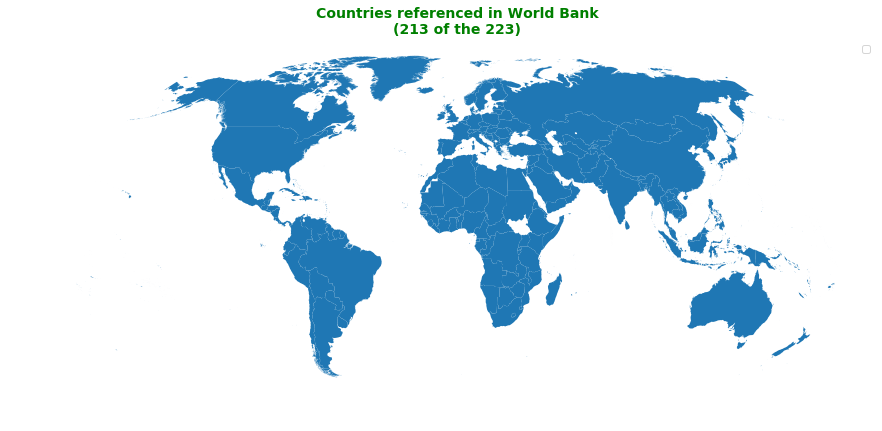

In [13]:
ax = df_countries_reference.plot(figsize=(15,8))
ax.set_axis_off()
ax.legend([liste_country_reference])
plt.title('''Countries referenced in World Bank\n({} of the {})'''.format(len(df_countries_reference.ADM0_A3), len(liste_country_reference)), fontsize=14, fontweight='bold',color='green')
#ax.get_legend().set_bbox_to_anchor((0.25, 0.5))
#plt.savefig('./graphiques/mapping_*****.png', dpi=120)
plt.show()

## <font color='orange'>World Income Distribution<font>

In [14]:
df_world_income_distribution = pd.read_csv('./data/world_income_distribution.csv')

In [15]:
df_world_income_distribution.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,"728,89795",7297
1,ALB,2008,2,100,"916,66235",7297
2,ALB,2008,3,100,"1010,916",7297
3,ALB,2008,4,100,"1086,9078",7297
4,ALB,2008,5,100,"1132,6997",7297


In [16]:
#convertions du types de certaines colonnes
df_world_income_distribution['income']=df_world_income_distribution['income'].str.replace(',','.')
df_world_income_distribution['income']=df_world_income_distribution['income'].apply(float)
df_world_income_distribution['gdpppp']=df_world_income_distribution['gdpppp'].str.replace(',','.')
df_world_income_distribution['gdpppp']=df_world_income_distribution['gdpppp'].apply(float)

In [17]:
len(df_world_income_distribution.country.unique())

116

<font color='red'>Many countries did not informed income distribution or gdpppp:  
Did, some countries, specified only one of both features here?<font>

In [18]:
print(df_world_income_distribution.country[df_world_income_distribution['gdpppp'].isin({np.nan})].unique())

['XKX' 'PSE']


In [19]:
print(df_world_income_distribution.country[df_world_income_distribution['income'].isin({np.nan})].unique())

[]


<font color='red'>2 countries did not specify GDPPPP:  
Palestinian Territory (PSE),  
Kosovo(XKX).  
Both are 'minor' for analysis. We can drop them.<font>

In [20]:
df_world_income_distribution=df_world_income_distribution.dropna()

#### <font color='red'>Inconsistent gdpppp values?<font>

In [21]:
df_world_income_distribution.gdpppp.describe()

count    1.139900e+04
mean     5.022128e+04
std      4.000688e+05
min      3.031931e+02
25%      2.576000e+03
50%      7.560000e+03
75%      1.877300e+04
max      4.300332e+06
Name: gdpppp, dtype: float64

#### <font color='red'>MAY BE<font>

In [22]:
#Extract too high gdpppp values
print(df_world_income_distribution.country[df_world_income_distribution['gdpppp']>5e+4].unique())

['FJI' 'LUX']


In [23]:
#Fiji:
#replace by gdpppp value from World Bank
df_world_income_distribution.loc[df_world_income_distribution['country'] == 'FJI', ['gdpppp']] = 4177

In [24]:
df_world_income_distribution[df_world_income_distribution['country']=='FJI'].head(1)

,country,year_survey,quantile,nb_quantiles,income,gdpppp
3200,FJI,2008,1,100,308.17334,4177.0


#### <font color='red'>One row is missing<font>

In [25]:
check = df_world_income_distribution.country.value_counts()

In [26]:
check[check!=100]

LTU    99
Name: country, dtype: int64

#### <font color='red'>One quantile of Lituania is not specified.<font>  
<font color='green'>it will be calculated as the average between quantile n + 1 and n-1. It will be unsignificantly approxiamtive.<font>

In [27]:
n=0
for i,ii in zip(df_world_income_distribution['quantile'][df_world_income_distribution['country']=='LTU'],np.arange(1,101,1)):
    diff=ii-i+n
    if diff<0:
        print('Quantile n°{} is missing'.format(ii))
        n=n+1

Quantile n°41 is missing


In [28]:
q_LTU_40 = int(df_world_income_distribution.income[df_world_income_distribution['country']=='LTU'][df_world_income_distribution['quantile']==40])
q_LTU_42 = int(df_world_income_distribution.income[df_world_income_distribution['country']=='LTU'][df_world_income_distribution['quantile']==42])

In [29]:
q_LTU_41=(q_LTU_40+q_LTU_42)/2

In [30]:
df_world_income_distribution=df_world_income_distribution.append({'country':'LTU','year_survey':2008,'quantile':41,'nb_quantiles':100,'income':q_LTU_41,'gdpppp':17571}, ignore_index=True)

In [31]:
#reorder the Dataframe
df_world_income_distribution=df_world_income_distribution.sort_values(by=['country','quantile'])
df_world_income_distribution.reset_index(drop=True,inplace=True)
liste_country_world_inc_distrib=df_world_income_distribution.country.unique()

#### <font color='green'>What about our countries referenced list? Can we replace missing values?<font>  
Unfortunatly, this kind of data (income distribution) is uncommon. Also, World Bank is the best source we can expect. Still, we could calculate/approximate some data via characteristic countries...not on all missing countries, but we could select some. We will think about it later.

#### <font color='red'>So, how much population do we cover until now?<font>

In [32]:
print('For now, our analysis covers {} countries. It become our new reference list.'.format(len(liste_country_world_inc_distrib)))
liste_country_reference=liste_country_world_inc_distrib

For now, our analysis covers 114 countries. It become our new reference list.


In [33]:
pop=df_pop2017['2017'][df_pop2017['Country Code'].isin(liste_country_reference)].sum()/df_pop2017['2017'].sum()
print('For now, our analysis covers {:.2f}% of the world population.'.format(pop*100))

For now, our analysis covers 88.81% of the world population.


#### <font color='green'>PRETTY COOD!!<font>

### World income distribution mapped

In [34]:
df_world_income_distribution.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0
3,ALB,2008,4,100,1086.90780,7297.0
4,ALB,2008,5,100,1132.69970,7297.0


In [35]:
gdf_world_income=gdf.copy()
gdf_world_income['state']=''
for country in gdf_world_income.ADM0_A3.unique():
    if country in liste_country_reference:
        gdf_world_income.loc[gdf_world_income['ADM0_A3'] == country, ['state']] = 'specified'
    else:
        gdf_world_income.loc[gdf_world_income['ADM0_A3'] == country, ['state']] = 'unspecified'

list_abs=[]
for country in liste_country_reference:
    if country not in gdf.ADM0_A3.unique():
        list_abs.append(country)
n_abs=len(list_abs)
print('{} countries from our reference list are not specified in our geopandas data:\n{}'.format(n_abs,list_abs))

0 countries from our reference list are not specified in our geopandas data:
[]


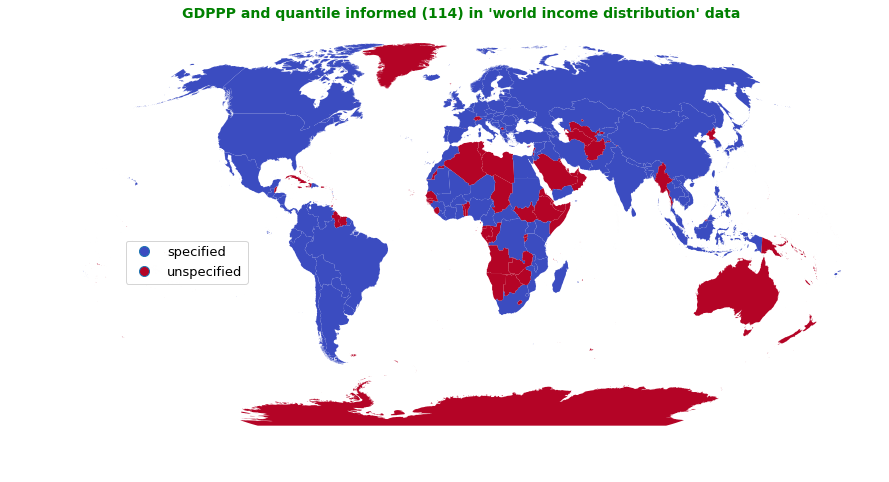

In [36]:
ax = gdf_world_income.plot(column='state', cmap='coolwarm', figsize=(15,8), legend=True,legend_kwds={'fontsize': 13})

ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((0.25, 0.5))
ax.set_title('''GDPPP and quantile informed ({}) in 'world income distribution' data '''.format(len(liste_country_reference)), fontsize=14, color='green', fontweight='bold')
plt.savefig('./graphiques/mapping_world_inc_distr_countries.png', dpi=120)
plt.show()

In [37]:
gdf_world_income.head()

,ADM0_A3,geometry,state
0,IDN,(POLYGON ((11108970.26020776 445285.1302330397...,specified
1,MYS,(POLYGON ((11108970.26020776 445285.1302330397...,specified
2,CHL,(POLYGON ((-6477059.899247097 -1872360.8384665...,specified
3,BOL,POLYGON ((-6477059.899247097 -1872360.83846657...,specified
4,PER,(POLYGON ((-6477059.899247097 -1872360.8384665...,specified


In [38]:
map_gdpppp=df_world_income_distribution[['country','gdpppp']].drop_duplicates().copy()

mapp_gdpppp=gdf.merge(map_gdpppp, left_on='ADM0_A3', right_on='country')

mapp_gdpppp=mapp_gdpppp[['ADM0_A3','geometry','gdpppp']]

/usr/local/lib/python3.6/dist-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


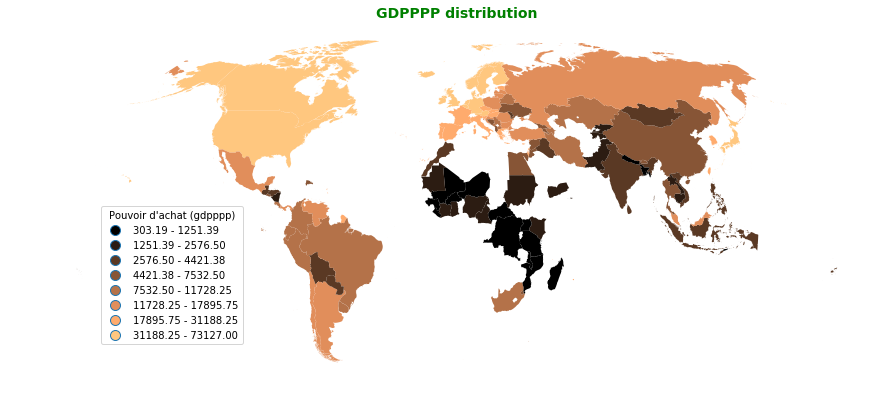

In [39]:
ax = mapp_gdpppp.plot('gdpppp', cmap='copper', figsize=(15,8), scheme='quantiles', k=8, legend=True,legend_kwds={'title': '''Pouvoir d'achat (gdpppp)''', 'fontsize': 10})

ax.set_title('''GDPPPP distribution''', fontsize=14, color='green', fontweight='bold')

ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((0.25, 0.5))
plt.savefig('./graphiques/mapping_gdpppp.png', dpi=120)

## <font color='orange'>IGEincome (elasticity)<font>

In [40]:
#Parents educational indexes are also extracted for a future analysis ()
df_GDIM_2018 = pd.read_csv('./data/GDIM_2018.csv')#heavy

df_IGE = df_GDIM_2018.copy()
df_IGE = df_IGE[['countryname','iso3','year','cohort','parent','child','IGEincome','MEANp','MEANc']]
df_IGE = df_IGE[df_IGE['IGEincome']>0]#garder les valeurs renseignées

df_IGE = df_IGE[df_IGE['parent']=='avg']
df_IGE = df_IGE[df_IGE['child']=='all']
df_IGE = df_IGE.sort_values(by='iso3')
df_IGE = df_IGE.rename(columns={'MEANp':'years_education_parents'})
df_IGE.head(2)

,countryname,iso3,year,cohort,parent,child,IGEincome,years_education_parents,MEANc
60,Albania,ALB,1970,1970,avg,all,0.815874,8.414939,11.197372
183,Australia,AUS,1960,1960,avg,all,0.275000,10.431962,13.000767


In [41]:
len(df_IGE)

70

In [42]:
liste_pays_IGEincome_known=list(df_IGE.iso3.unique())
len(liste_pays_IGEincome_known)

70

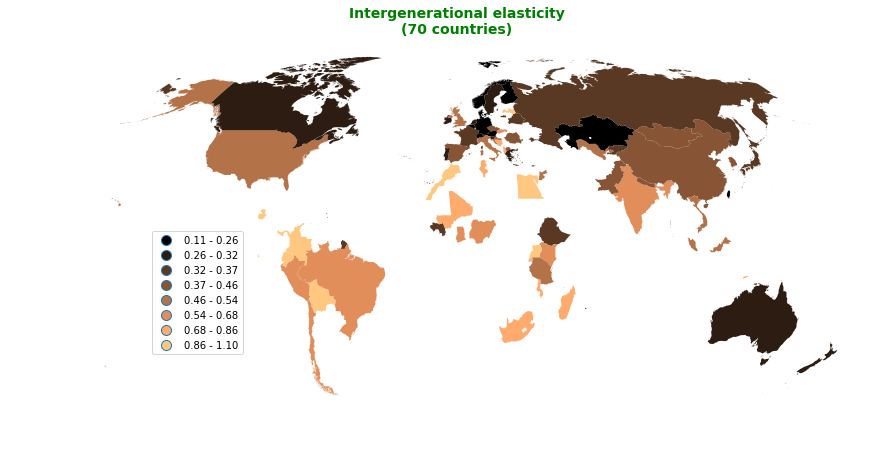

In [43]:
map_IGEincome = gdf.merge(df_IGE, left_on='ADM0_A3', right_on='iso3')
colors = 8
ax = map_IGEincome.plot(column='IGEincome', cmap='copper', figsize=(15,8), scheme='quantiles', k=colors, legend=True)
ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((0.25, 0.5))
plt.title('''Intergenerational elasticity\n({} countries)'''.format(len(map_IGEincome.iso3.unique())), fontsize=14, color='green', fontweight='bold')
plt.savefig('./graphiques/mapping_IGEincome.png', dpi=120)
plt.show()

### <font color='red'>Too many unspecified countries<font>  
#### we need to approximate missing values from countries that have similar characteristics however we will loose too many data

In [44]:
len(liste_country_reference)

114

In [45]:
#extract countries from reference list but missing in IGEincome_known
missing_IGEincome=[x for x in liste_country_reference if x not in liste_pays_IGEincome_known]
#extrapolate IGEincome
len(missing_IGEincome)

51

In [46]:
#Countries that i can't even hope to approximate IGEincome:
liste_pays_IGE=df_GDIM_2018.iso3.unique()

out_of_IGE=[x for x in liste_country_reference if x not in liste_pays_IGE]

out_of_IGE

['SYR']

#### <font color='red'>So, we can't expect approximate Syrian features: we don't even have a comon characteristic to start with.  However other missing countries could be approximated.<font>

In [47]:
try:
    missing_IGEincome.remove('SYR')
except:
    pass
len(missing_IGEincome)

50

In [48]:
df_countries_IGE_approx = df_GDIM_2018[df_GDIM_2018['iso3'].isin(missing_IGEincome)].copy()
df_countries_IGE_approx = df_countries_IGE_approx[['iso3']]
df_countries_IGE_approx = df_countries_IGE_approx.drop_duplicates().reset_index(drop=True)
df_countries_IGE_approx['IGEincome']='abs'
#some countries have an IGEincome but not good parent/child/...

In [49]:
df_countries_IGE_approx.head()

,iso3,IGEincome
0,ARG,abs
1,ARM,abs
2,AZE,abs
3,BFA,abs
4,BGD,abs


In [50]:
list_b=[]
list_c=[]
list_d=[]

for country in df_countries_IGE_approx.iso3:
    try:
        zone=df_GDIM_2018.loc[(df_GDIM_2018["iso3"]== country) & (df_GDIM_2018["cohort"]==1980), "region"].values[0]
        grp2=df_GDIM_2018.loc[(df_GDIM_2018["iso3"]== country) & (df_GDIM_2018["cohort"]==1980), "incgroup2"].values[0]
        grp4=df_GDIM_2018.loc[(df_GDIM_2018["iso3"]== country) & (df_GDIM_2018["cohort"]==1980), "incgroup4"].values[0]
        list_b.append(zone)
        list_c.append(grp2)
        list_d.append(grp4)
    except:
        list_b.append('abs')
        list_c.append('abs')
        list_d.append('abs')

In [51]:
df_countries_IGE_approx['region']=list_b
df_countries_IGE_approx['incgroup2']=list_c
df_countries_IGE_approx['incgroup4']=list_d

In [52]:
df_countries_IGE_approx.head()

,iso3,IGEincome,region,incgroup2,incgroup4
0,ARG,abs,Latin America & Caribbean,Developing economies,Upper middle income
1,ARM,abs,Europe & Central Asia,Developing economies,Lower middle income
2,AZE,abs,Europe & Central Asia,Developing economies,Upper middle income
3,BFA,abs,Sub-Saharan Africa,Developing economies,Low income
4,BGD,abs,South Asia,Developing economies,Lower middle income


In [53]:
#EXCEPTIONS?
df_countries_IGE_approx.loc[(df_countries_IGE_approx["region"]== 'abs') | (df_countries_IGE_approx["incgroup2"]== 'abs') | (df_countries_IGE_approx["incgroup4"]== 'abs'),'iso3']

27    LUX
Name: iso3, dtype: object

#### <font color='red'>Luxembourg ('LUX') is not secified on this features. We can handly correct it.
-region: 'High income'  
-incgroup2: 'High-income economies'  
-incgroup4: 'High income'<font>

In [54]:
#Luxembourg corrections
df_countries_IGE_approx.loc[df_countries_IGE_approx['iso3'] == 'LUX', ['region']] = 'High income'
df_countries_IGE_approx.loc[df_countries_IGE_approx['iso3'] == 'LUX', ['incgroup2']] = 'High-income economies'
df_countries_IGE_approx.loc[df_countries_IGE_approx['iso3'] == 'LUX', ['incgroup4']] = 'High income'

In [55]:
df_IGE.head()

,countryname,iso3,year,cohort,parent,child,IGEincome,years_education_parents,MEANc
60,Albania,ALB,1970,1970,avg,all,0.815874,8.414939,11.197372
183,Australia,AUS,1960,1960,avg,all,0.275000,10.431962,13.000767
243,Austria,AUT,1960,1960,avg,all,0.245267,10.062304,13.047010
351,Belgium,BEL,1960,1960,avg,all,0.183176,8.950124,13.483537
538,Bosnia and Herzegovina,BIH,1970,1970,avg,all,0.827252,8.103372,10.776841


In [56]:
list_approx_IGE=[]
n=0
for country in df_countries_IGE_approx.iso3:
    zone=df_countries_IGE_approx['region'].loc[df_countries_IGE_approx['iso3'].isin({country})]
    grp2=df_countries_IGE_approx['incgroup2'].loc[df_countries_IGE_approx['iso3'].isin({country})]
    grp4=df_countries_IGE_approx['incgroup4'].loc[df_countries_IGE_approx['iso3'].isin({country})]
    try:
        approx_IGE=df_GDIM_2018.IGEincome[(df_GDIM_2018['cohort'].isin([1980,1970,1960])) & (df_GDIM_2018["region"].isin(zone)) & (df_GDIM_2018["incgroup2"].isin(grp2)) & (df_GDIM_2018["incgroup4"].isin(grp4))].mean()
        list_approx_IGE.append(approx_IGE)
    except:
        n=n+1
        print(country,n)

In [57]:
df_countries_IGE_approx['IGEincome']=list_approx_IGE

In [58]:
df_countries_IGE_approx.head()

,iso3,IGEincome,region,incgroup2,incgroup4
0,ARG,0.878852,Latin America & Caribbean,Developing economies,Upper middle income
1,ARM,0.424817,Europe & Central Asia,Developing economies,Lower middle income
2,AZE,0.477171,Europe & Central Asia,Developing economies,Upper middle income
3,BFA,0.661654,Sub-Saharan Africa,Developing economies,Low income
4,BGD,0.523840,South Asia,Developing economies,Lower middle income


In [59]:
df_final_IGE = pd.concat([df_IGE[['iso3','IGEincome']],df_countries_IGE_approx[['iso3','IGEincome']]],ignore_index=True)

In [60]:
df_final_IGE.head()

,iso3,IGEincome
0,ALB,0.815874
1,AUS,0.275000
2,AUT,0.245267
3,BEL,0.183176
4,BIH,0.827252


In [61]:
df_final_IGE=df_final_IGE[df_final_IGE['iso3'].isin(liste_country_reference)]

In [62]:
len(liste_country_reference)

114

In [63]:
len(df_final_IGE.iso3)

113

In [64]:
print([x for x in liste_country_reference if not x in list(df_final_IGE.iso3)])

['SYR']


#### <font color='green'>Still Syria out, update liste_country_reference:<font>

In [65]:
liste_country_reference=list(df_final_IGE.iso3)

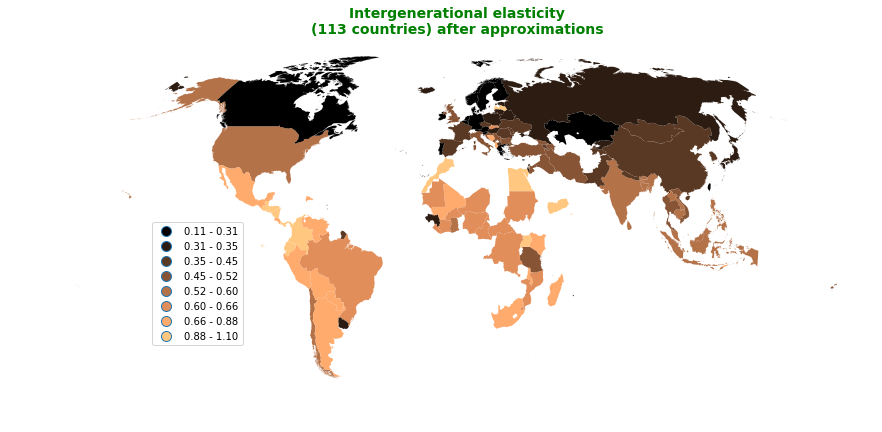

In [66]:
map_IGEincome = gdf.merge(df_final_IGE, left_on='ADM0_A3', right_on='iso3')
colors = 8
ax = map_IGEincome.plot(column='IGEincome', cmap='copper', figsize=(15,8), scheme='quantiles', k=colors, legend=True)
ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((0.25, 0.5))
plt.title('''Intergenerational elasticity\n({} countries) after approximations'''.format(len(map_IGEincome.iso3.unique())), fontsize=14, color='green', fontweight='bold')
plt.savefig('./graphiques/mapping_IGEincome_full.png', dpi=120)
plt.show()

## <font color='orange'>GINI index<font>

In [67]:
df_world_bank_GINI = pd.read_csv('./data/GINI_wirkd_bank_1969_2017.csv')

In [68]:
len(df_world_bank_GINI)

264

#### <font color='red'>Some countries are not informed, others are informed above several years. We will keep the most recent for each country (informed)<font>

#### <font color='red'>We are able to find some of the unspecified gini indexes (governemental intelligence). We will if needed<font>

In [69]:
df_GINI_recent = df_world_bank_GINI.copy()

In [70]:
liste_year=[]
for i in df_GINI_recent['Country Code'].unique():
    df=df_GINI_recent[df_GINI_recent['Country Code'].isin({i})]
    df=df.dropna(axis='columns')
    columns=df.columns[4:]
    liste_z=[]
    for col in columns:
        colint=int(col)
        liste_z.append((i,colint))
    if len(liste_z)>0:
        liste_year.append(sorted(liste_z,reverse=True)[0])

liste_ii=[]
liste_i=[]
liste_gini=[]

for i,ii in (liste_year):
    liste_i.append(i)
    liste_ii.append(ii)
    gin = float(df_world_bank_GINI['{}'.format(ii)][df_world_bank_GINI['Country Code']==i])
    liste_gini.append(gin)

In [71]:
df_GINI_recent_know=pd.DataFrame({'country':liste_i,'year_GINI':liste_ii,'GINI':liste_gini})

In [72]:
df_GINI_recent_know.head()

,country,year_GINI,GINI
0,AGO,2008,42.7
1,ALB,2012,29.0
2,ARG,2016,42.4
3,ARM,2016,32.5
4,AUS,2010,34.7


In [73]:
df_GINI_recent_know.describe()

,year_GINI,GINI
count,161.000000,161.000000
mean,2012.583851,38.438509
std,4.264034,8.028567
min,1992.000000,16.600000
25%,2011.000000,32.700000
50%,2014.000000,37.400000
75%,2015.000000,43.100000
max,2017.000000,63.000000


#### <font color='red'> NO inconsistent value<font>

In [74]:
liste_pays_GINI_known = list(df_GINI_recent_know.country.unique())

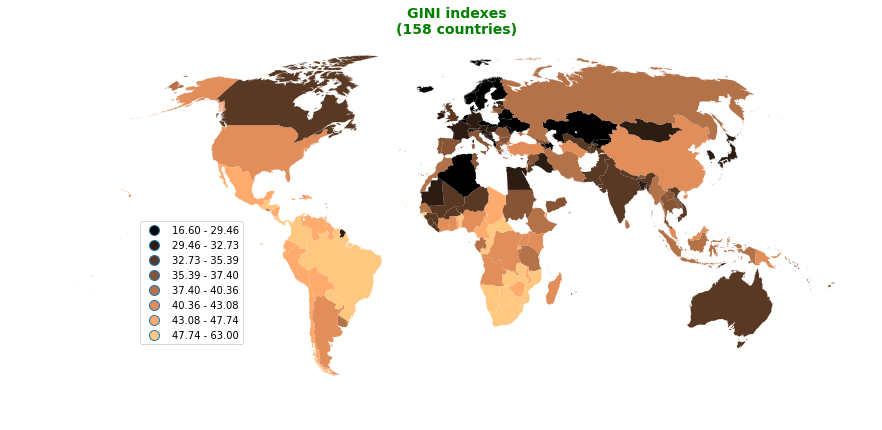

In [75]:
map_GINI = gdf.merge(df_GINI_recent_know, left_on='ADM0_A3', right_on='country')
colors = 8
ax = map_GINI.plot(column='GINI', cmap='copper', figsize=(15,8), scheme='quantiles', k=colors, legend=True)
ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((0.25, 0.5))
plt.title('GINI indexes\n({} countries)'.format(len(map_GINI.country)), fontsize=14, color='green', fontweight='bold')
plt.savefig('./graphiques/mapping_GINI.png', dpi=120)
plt.show()

In [76]:
#difference with number of mapped countries
print(len(df_GINI_recent_know.GINI),len(map_GINI.country))

161 158


In [77]:
miss=[x for x in df_GINI_recent_know.country if x not in list(map_GINI.country)]

In [78]:
df_GINI_recent_know[df_GINI_recent_know['country'].isin(miss)]

,country,year_GINI,GINI
117,PSE,2016,33.7
126,SSD,2009,46.3
156,XKX,2016,26.5


#### <font color='red'>These countries won't be mapped because they are out of the geopandas database: THEN they still can be in our analysis<font>

In [79]:
gdf[gdf['ADM0_A3'].isin(miss)]

,ADM0_A3,geometry


### <font color='red'>Do we have GINI for all our referece country list?<font>

In [80]:
print([x for x in liste_country_reference if not x in list(df_GINI_recent_know.country)])

['TWN', 'KHM', 'PHL', 'POL', 'SRB']


### <font color='green'>Let's correct this handly: form other sources<font>

In [81]:
#Taïwan 2012 CIA data
df_GINI_recent_know=df_GINI_recent_know.append({'country':'TWN', 'year_GINI':2012,'GINI':33.8}, ignore_index=True)
#Poland 2014 World Bank data
df_GINI_recent_know=df_GINI_recent_know.append({'country':'POL', 'year_GINI':2014,'GINI':32.1}, ignore_index=True)
#Philippines 2015 World Bank data
df_GINI_recent_know=df_GINI_recent_know.append({'country':'PHL', 'year_GINI':2015,'GINI':40.1}, ignore_index=True)
#Cambodia 2014 World Bank data
df_GINI_recent_know=df_GINI_recent_know.append({'country':'KHM', 'year_GINI':2014,'GINI':3.8}, ignore_index=True)
#Serbia 2013 World Bank data
df_GINI_recent_know=df_GINI_recent_know.append({'country':'SRB', 'year_GINI':2013,'GINI':29.1}, ignore_index=True)

In [82]:
print([x for x in liste_country_reference if not x in list(df_GINI_recent_know.country)])

[]


# <font color='orange'>MAPPING DES PAYS DONT NOUS DISPOSONS TOUTES LES DONNEES NECESSAIRES AU PROJET: GINI, INCOMES et IGEincome.<font>

In [83]:
df_final = df_final_IGE.merge(df_GINI_recent_know, left_on='iso3', right_on='country',)

In [84]:
df_final=df_final.drop(columns='iso3')
df_final=df_final[['country','IGEincome','year_GINI','GINI']]
df_final.head()

,country,IGEincome,year_GINI,GINI
0,ALB,0.815874,2012,29.0
1,AUT,0.245267,2015,30.5
2,BEL,0.183176,2015,27.7
3,BIH,0.827252,2015,32.7
4,BLR,0.342738,2016,27.0


In [85]:
liste_country_reference=list(df_final.country.unique())
print(len(liste_country_reference))

113


In [86]:
pop_data=df_pop2017['2017'][df_pop2017['Country Code'].isin(liste_country_reference)].sum()

In [87]:
map_pop2017=gdf.copy()

liste_etat=[]

for iso in list(map_pop2017.ADM0_A3.unique()):
    if iso in liste_country_reference:
        liste_etat.append('renseigné')
    else:
        liste_etat.append('non-renseigné')

map_pop2017['état']=liste_etat

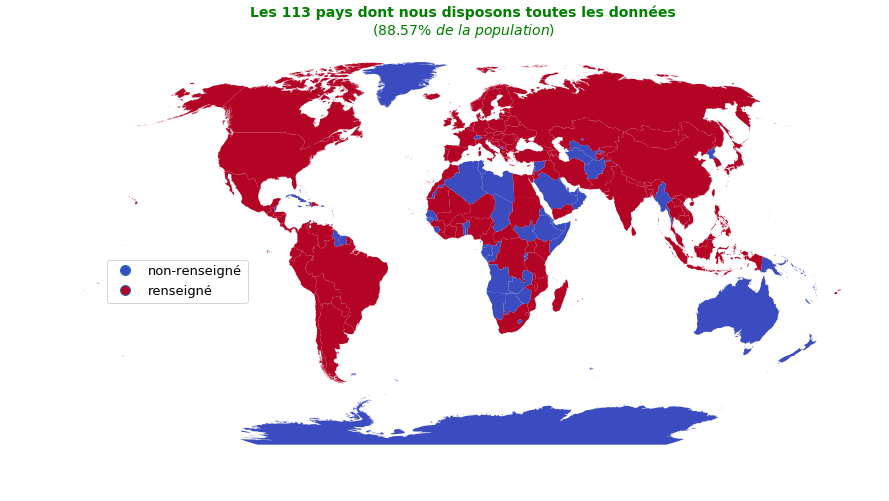

In [88]:
ax = map_pop2017.plot(column='état', cmap='coolwarm', figsize=(15,8), legend=True,legend_kwds={'fontsize': 13})

ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((0.25, 0.5))
ax.set_title('''Les {} pays dont nous disposons toutes les données\n$({:.2f}\%\ de\ la\ population)$'''.format(len(liste_country_reference),pop_data/pop2017*100), fontsize=14, color='green', fontweight='bold')
plt.savefig('./graphiques/mapping_countries_alldata_known.png', dpi=120)
plt.show()

### <font color='red'>SOME COUNTRIES ARE STILL MISSING<font>  
#### Because they did not specified IGEincome, however we can't approximate it, too risky: too many countries, different sources and take a long time.
### <font color='green'>By the way our analysis is based on 113 countries and >88% of the world population<font>

# <font color='blue'>MISSION 2<font>

## <font color='orange'>Income diversity in the world<font>

#### Pays choisis: chaque pays dont le $ppp est représentatif de chaque décile de revenu

In [89]:
#Récupérer la liste des pays renseignés dans chaque DataFrame (GINI et income)
liste_country_in_world_bank_GINI = df_world_bank_GINI['Country Code'].unique()
liste_country_in_world_income_distribution = df_world_income_distribution['country'].unique()

In [90]:
intersection_country_list= [value for value in liste_country_in_world_income_distribution if value in liste_country_in_world_bank_GINI]

In [91]:
df_country_10 = df_world_income_distribution.copy()
df_country_10 = df_country_10[['country','income']]

In [92]:
#Récupérer les valeurs des déciles relatifs aux gdpppp des pays
df_country_10c = df_world_income_distribution.copy()
df_country_10c = df_country_10c[['country','gdpppp']]
df_country_10c = df_country_10c.drop_duplicates()
df_country_10c = df_country_10c.dropna()
df_country_10c = df_country_10c[df_country_10c['country'].isin(intersection_country_list)]

In [93]:
decile_10c = np.percentile(df_country_10c['gdpppp'],np.arange(0,100,10))

In [94]:
decile_10c

array([   303.19305  ,   1091.03756  ,   2021.4      ,   3267.6      ,
         4523.5864408,   7505.       ,  10486.4      ,  13407.6      ,
        22716.2      ,  33731.6      ])

In [95]:
for ndec , dec in zip(np.arange(1,11,1),decile_10c):
    df_country_10c['decile_{}={}'.format(ndec,dec)] = abs(df_country_10c['gdpppp']-dec)

In [96]:
#Récupérer les pays représentatif de chaque décile
country_list=[]
country_code_list=[]
columns = df_country_10c.columns[3:]
for column in columns:
    diffmin = df_country_10c['{}'.format(column)].min()
    country = df_country_10c['country'][df_country_10c['{}'.format(column)]==diffmin]
    country_list.extend(country)
for state in country_list:
    state_code = df_country_10c.country[df_country_10c['country'].isin({'{}'.format(state)})]
    country_code_list.extend(state_code)
country_code_list

['BFA', 'CMR', 'MNG', 'BTN', 'DOM', 'KAZ', 'CHL', 'CZE', 'DEU']

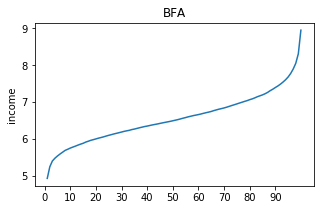

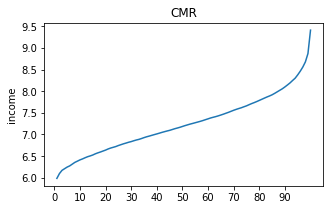

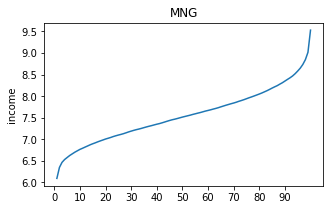

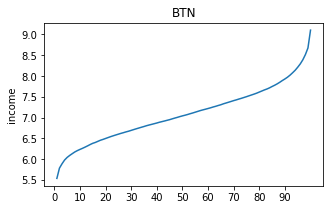

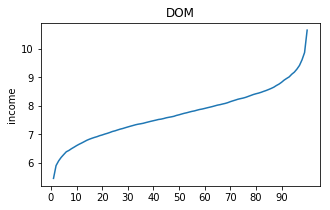

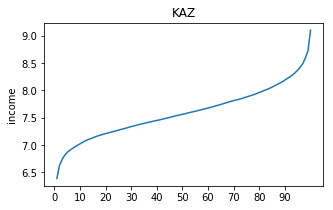

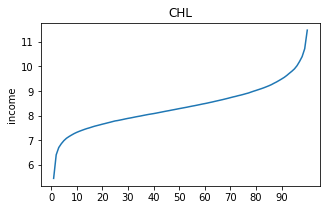

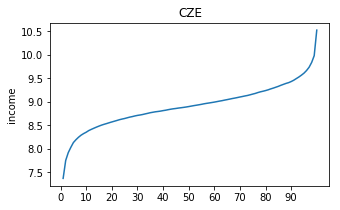

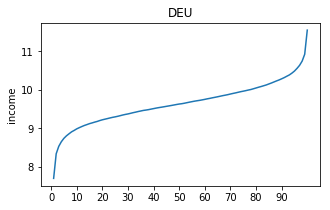

In [97]:
for code_country, name_country in zip(country_code_list,country_list):
    df = df_country_10[df_country_10['country'].isin({'{}'.format(code_country)})]
    plt.figure(figsize=(5,3))
    sns.lineplot(x=np.arange(1,101,1),y=np.log(df.income))
    plt.title('{}'.format(name_country))
    plt.xticks(np.arange(0,91,10))

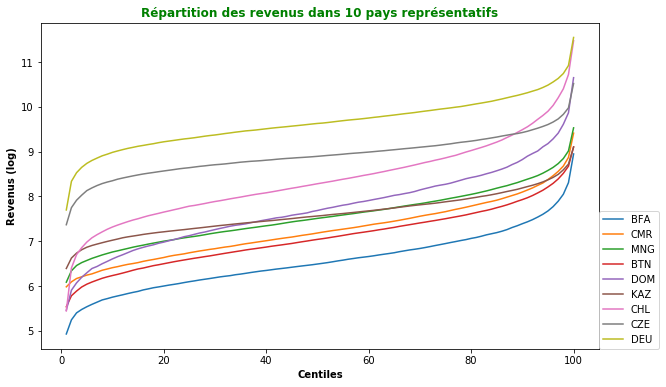

In [98]:
plt.figure(figsize=(10,6))
for country in country_list:
    x = np.arange(1, 101,1)
    y = np.log(df_country_10.income[df_country_10['country']==country])
    plt.plot(x,y)
    plt.legend(country_list, loc=(1,0))
plt.title('Répartition des revenus dans 10 pays représentatifs',color='g', fontsize=12, fontweight='bold')
plt.xlabel('Centiles', fontweight='bold')
plt.ylabel('Revenus (log)', fontweight='bold')
plt.savefig('./graphiques/log_gdppp_1O_countries.png', dpi=120)
plt.show()

## <font color='orange'>Lorenz curve (of the 10th countries)<font>

In [99]:
def lorenz_curve_gini(column,x_title, title_name, file_name, to_save):
#LORENZ curve
    x = column.values
    lorenz = np.cumsum(np.sort(x)) / x.sum()
    lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
    plt.plot(np.linspace(0,1, len(lorenz)), lorenz, drawstyle='steps-post')
    plt.title('Courbe de Lorenz: {}en 2008'.format(title_name), fontsize=12, fontweight='bold')
    plt.xlabel('{}'.format(x_title), fontsize=10, fontweight='bold')
    plt.ylabel('% de la somme totale des valeurs', fontsize=10, fontweight='bold')
    if to_save is not None:
        plt.savefig('./Graphiques/{}.png'.format(file_name), dpi=150)
#COEFF de GINI
    aire_sous_courbe = lorenz[:-1].sum()/len(lorenz)
    S = 0.5 - aire_sous_courbe #0.5 est l'aire sous la bissectrice
    gini = 2*S
    plt.show(), print('Le coefficient de gini est de: {}.'.format(abs(gini)))

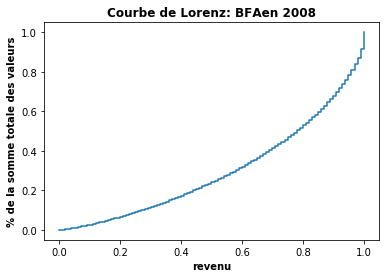

Le coefficient de gini est de: 0.41346878201853854.


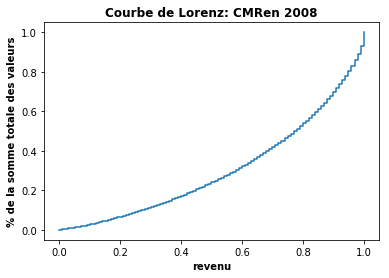

Le coefficient de gini est de: 0.4053094905846134.


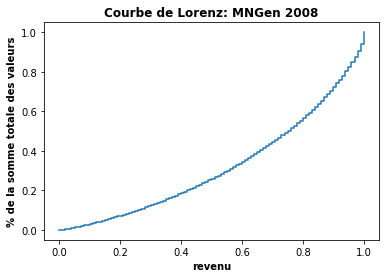

Le coefficient de gini est de: 0.3743074557592819.


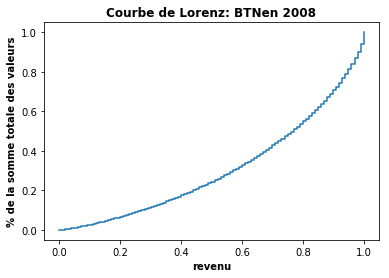

Le coefficient de gini est de: 0.396847074350242.


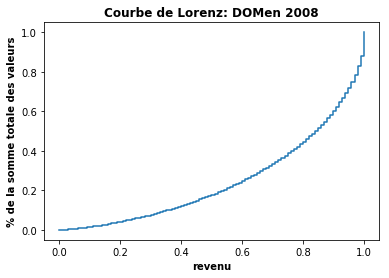

Le coefficient de gini est de: 0.5173504798209367.


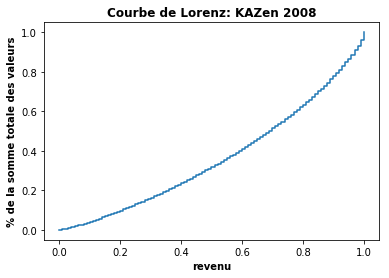

Le coefficient de gini est de: 0.2844987367955639.


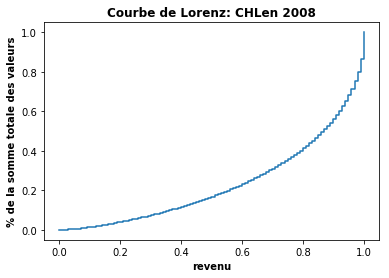

Le coefficient de gini est de: 0.5461147218700535.


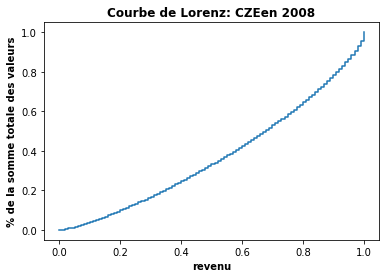

Le coefficient de gini est de: 0.2701622826475536.


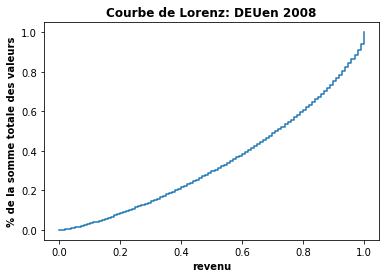

Le coefficient de gini est de: 0.32323295943419517.


In [100]:
for country in country_list:
    data0 = df_country_10[df_country_10['country']==country]
    lorenz_curve_gini(data0.income, 'revenu','{}'.format(country),None,None)
plt.show()

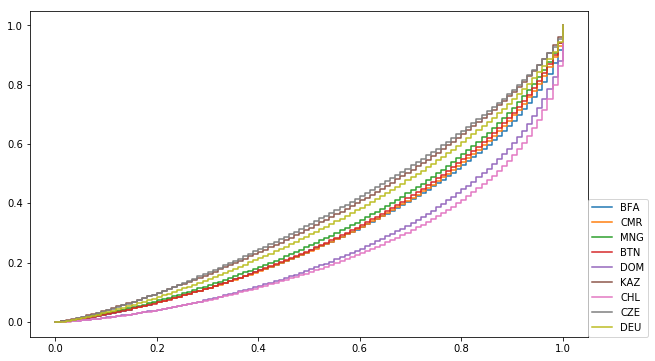

In [101]:
plt.figure(figsize=(10,6))
for country in country_list:
    x = df_country_10.income[df_country_10['country']==country].values
    lorenz = np.cumsum(np.sort(x)) / x.sum()
    lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
    plt.plot(np.linspace(0,1, len(lorenz)), lorenz, drawstyle='steps-post')
    plt.legend(country_list, loc=(1,0))

plt.savefig('./graphiques/lorenz_curve_1O__countries.png', dpi=120)
plt.show()

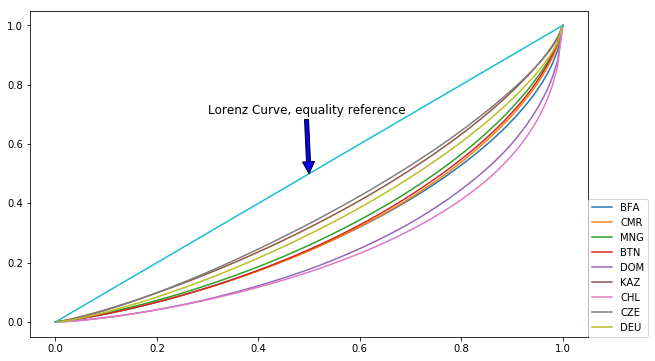

In [102]:
def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

plt.figure(figsize=(10,6))
for country in country_list:
    x = df_country_10.income[df_country_10['country']==country].values
    lorenz_curve = lorenz(x)
    plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
    plt.legend(country_list, loc=(1,0))
plt.plot([0,1], [0,1])
plt.annotate('Lorenz Curve, equality reference', xy=(0.5, 0.5), xytext=(0.3, 0.7),size=12,
            arrowprops=dict(facecolor='blue', shrink=0)
            )
plt.savefig('./graphiques/lorenz_curve_1O__countries.png', dpi=120)
plt.show()

## <font color='orange'>GINI evolution (some issues due to unspecified data)<font>

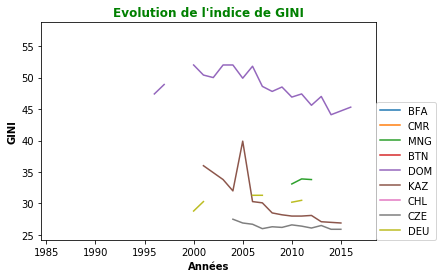

In [103]:
list_years = list(np.arange(1960,2018,1))
for country in country_list:
    list_gini = []
    for year in list_years:
        gini = df_world_bank_GINI['{}'.format(year)][df_world_bank_GINI['Country Code'].isin({country})].values
        list_gini.extend(gini)
    x=list_years
    y=list_gini
    plt.plot(x,y)
plt.legend(country_list, loc=(1,0))
plt.title('''Evolution de l'indice de GINI''',color='g', fontsize=12, fontweight='bold')
plt.xlabel('Années', fontweight='bold')
plt.ylabel('GINI', fontweight='bold')
plt.savefig('./graphiques/timelapse_GINI.png', dpi=120)
plt.show()

list_years = list(np.arange(1960,2018,1))
for country in country_list:
    list_gini = []
    for year in list_years:
        gini = df_world_bank_GINI['{}'.format(year)][df_world_bank_GINI['Country Name'].isin({country})].values
        list_gini.extend(gini)
    x=list_years
    y=list_gini
    plt.plot(x,y)
    plt.title('''Evolution de l'indice de GINI de:\n{}'''.format(country),color='g', fontsize=12, fontweight='bold')
    plt.xlabel('Années', fontweight='bold')
    plt.ylabel('GINI', fontweight='bold')
    plt.show()

## <font color='orange'>GINI ranking<font>

In [104]:
x_fr=df_GINI_recent_know.sort_values(by='GINI',ascending=False).reset_index(drop=True)[df_GINI_recent_know.sort_values(by='GINI',ascending=False).reset_index(drop=True)['country']=='FRA'].index[0]
y_fr=df_GINI_recent_know.GINI[df_GINI_recent_know['country']=='FRA']

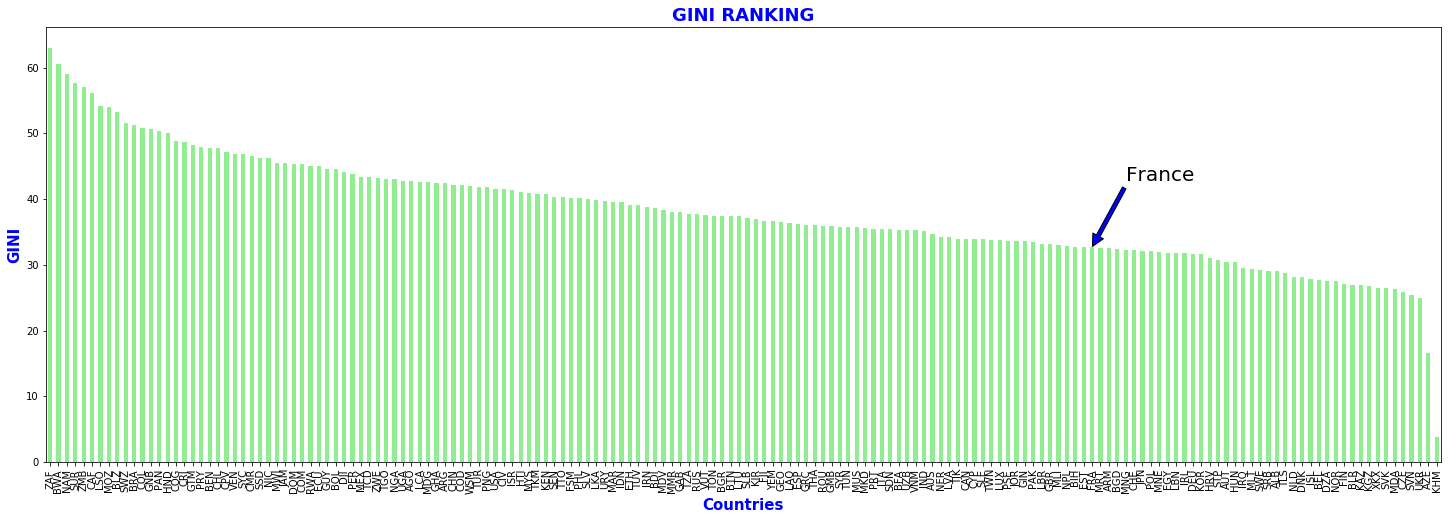

<Figure size 432x288 with 0 Axes>

In [105]:
df_GINI_recent_know.sort_values(by='GINI',ascending=False).plot(
    kind='bar',x='country',y='GINI', legend=False,figsize=(25,8), color='lightgreen')

plt.title('GINI RANKING', fontsize=18, fontweight='bold', color='b')
plt.xlabel('Countries', fontsize=15, fontweight='bold',color='b')
plt.ylabel('GINI', fontsize=15, fontweight='bold',color='b')
plt.annotate('France', xy=(x_fr, y_fr), xytext=(x_fr+4, y_fr+10),size=20,
            arrowprops=dict(facecolor='blue', shrink=0.01)
            )
plt.show()
plt.savefig('./graphiques/classement_GINI_countries.png', dpi=120)

# <font color='blue'>MISSION 3<font>

#### <font color= 'organge'>Creating baseline dataframe<font>

In [106]:
df_baseline = df_final[['country','IGEincome','GINI']].merge(df_world_income_distribution[['country','gdpppp']], on='country')
df_baseline = df_baseline.drop_duplicates().reset_index(drop=True)
df_baseline.head()

,country,IGEincome,GINI,gdpppp
0,ALB,0.815874,29.0,7297.0
1,AUT,0.245267,30.5,36193.0
2,BEL,0.183176,27.7,33561.0
3,BIH,0.827252,32.7,7472.0
4,BLR,0.342738,27.0,11651.0


### <font color='orange'>Instructions 1 & 2 generate Ln(Yparents) and errors<font>

In [107]:
n=100 # centiles
n_indiv = n*1000 # nombre d'individus
#On aura donc 1K individus pour chaque centile et 100k individus parents par pays
#On génère les indivdus parents
list_erreurE = st.norm(0,1).rvs(size=n_indiv) #erreurs générées selon une loi normale (0,1)
list_LnYparent = st.norm(10,1).rvs(size=n_indiv) #Ln du revenu des parents générés selon une loi normale (10,1)

In [108]:
df_instruction=df_baseline[['country','IGEincome']].iloc[np.repeat(np.arange(len(df_baseline)), 1000*n)]
df_instruction=df_instruction.reset_index(drop=True)
df_instruction.head()

,country,IGEincome
0,ALB,0.815874
1,ALB,0.815874
2,ALB,0.815874
3,ALB,0.815874
4,ALB,0.815874


In [109]:
print('So, there is {} individual per country'.format(len(df_instruction)/len(df_instruction.country.unique())))

So, there is 100000.0 individual per country


In [110]:
#repeat lists to match with the DataFrame
list_erreurE_matched = np.tile(list_erreurE,len(df_instruction.country.unique()))
list_LnYparent_matched = np.tile(list_LnYparent,len(df_instruction.country.unique()))

df_instruction['Ln_parents_income'] = list_LnYparent_matched 
df_instruction['error']= list_erreurE_matched

In [111]:
df_instruction.head()

,country,IGEincome,Ln_parents_income,error
0,ALB,0.815874,10.974675,-0.550016
1,ALB,0.815874,10.595177,-0.002821
2,ALB,0.815874,10.077765,-0.148889
3,ALB,0.815874,10.202282,-0.700357
4,ALB,0.815874,9.342409,-0.074408


### <font color='orange'>Instructions 3 child and parents incomes<font>

In [112]:
df_instruction1 = df_instruction.copy()

In [113]:
#child income
df_instruction1['incomes_child'] = np.exp(df_instruction1.IGEincome*df_instruction1.Ln_parents_income+df_instruction1.error)

In [114]:
#parents income
df_instruction1['incomes_parents'] = np.exp(df_instruction1.Ln_parents_income)

In [115]:
df_instruction1.head()

,country,IGEincome,Ln_parents_income,error,incomes_child,incomes_parents
0,ALB,0.815874,10.974675,-0.550016,4464.630637,58376.893322
1,ALB,0.815874,10.595177,-0.002821,5661.896754,39941.751641
2,ALB,0.815874,10.077765,-0.148889,3207.677385,23807.726673
3,ALB,0.815874,10.202282,-0.700357,2045.555680,26964.649911
4,ALB,0.815874,9.342409,-0.074408,1896.614630,11411.868850


### <font color='orange'>Instructions 4 calculate child and parents classes distrtibution in each country<font>

In [116]:
dictio_deciles_child={}
dictio_deciles_parents={}
for country in df_instruction1.country.unique():
    #Détermination des limites des centiles enfant et centiles parents
    liste_deciles_incomes_child = []
    liste_deciles_incomes_parent = []
    df=df_instruction1[df_instruction1['country']==country]
    for i in np.arange(0.01,1.01,0.01): #centiles dans la méthode pour la méthode .quantile()
        exec('deci_child = df.incomes_child.quantile({})'.format(i))
        liste_deciles_incomes_child.append(deci_child)
        exec('deci_parents = df.incomes_parents.quantile({})'.format(i))
        liste_deciles_incomes_parent.append(deci_parents)
    dictio_deciles_parents[country]=liste_deciles_incomes_parent
    dictio_deciles_child[country]=liste_deciles_incomes_child

In [117]:
#Détermination des décile enfant de chaque individus et récupération dans une liste
liste_deci_child=[]
list_inc_child=list(df_instruction1.incomes_child)
list_df_instruction1_country = list(df_instruction1.country)

for country, inc_child in zip (list_df_instruction1_country,list_inc_child):
    list_decile_limits=dictio_deciles_child[country]
    for deci,incomes_deci in zip (np.arange(1,101,1),list_decile_limits):
        if inc_child < incomes_deci:
            liste_deci_child.append(deci)
            break
        elif inc_child >= list_decile_limits[99]:
            liste_deci_child.append(100)
            break

In [118]:
#Détermination des décile parents de chaque individus et récupération dans une liste
liste_deci_parents=[]
list_inc_parents=list(df_instruction1.incomes_parents)

for country, inc_parents in zip (list_df_instruction1_country,list_inc_parents):
    list_decile_limits=dictio_deciles_parents[country]
    for deci,incomes_deci in zip (np.arange(1,101,1),list_decile_limits):
        if inc_parents < incomes_deci:
            liste_deci_parents.append(deci)
            break
        elif inc_parents >= list_decile_limits[99]:
            liste_deci_parents.append(100)
            break

In [119]:
df_instruction1['deci_child']=liste_deci_child
df_instruction1['deci_parents']=liste_deci_parents

In [120]:
df_instruction1.head()

,country,IGEincome,Ln_parents_income,error,incomes_child,incomes_parents,deci_child,deci_parents
0,ALB,0.815874,10.974675,-0.550016,4464.630637,58376.893322,58,84
1,ALB,0.815874,10.595177,-0.002821,5661.896754,39941.751641,65,73
2,ALB,0.815874,10.077765,-0.148889,3207.677385,23807.726673,48,54
3,ALB,0.815874,10.202282,-0.700357,2045.555680,26964.649911,34,58
4,ALB,0.815874,9.342409,-0.074408,1896.614630,11411.868850,32,26


### <font color='orange'>Instructions 5 parents & child classes probabilities<font>

In [121]:
df_instructions1_count=df_instruction1[['country','deci_parents','deci_child']].copy()
df_instructions1_count['n_count']=1

#Faire attention à l'ordre de groupby (qu'il corresponde à la dataframe finale)
df_instructions1_count=df_instructions1_count.groupby(['country','deci_parents','deci_child'],sort=True).count().unstack(fill_value=0).stack()

In [122]:
df_instructions1_count['proba_percent']=df_instructions1_count.n_count/10
df_instructions1_count=df_instructions1_count.reset_index()
df_instructions1_count.head()

,country,deci_parents,deci_child,n_count,proba_percent
0,ALB,1,1,207,20.7
1,ALB,1,2,108,10.8
2,ALB,1,3,78,7.8
3,ALB,1,4,45,4.5
4,ALB,1,5,67,6.7


### <font color='orange'>Instructions 6 graphs (max and min IGEincome)<font>

In [123]:
#extract reference IGEincome countries
max_IGEincome = df_final.country.loc[df_final['IGEincome'].idxmax()]
min_IGEincome = df_final.country.loc[df_final['IGEincome'].idxmin()]
print('''Country having highest IGEincome: {}\nCountry having lowest IGEincome: {}\n'''.format(max_IGEincome,min_IGEincome))

Country having highest IGEincome: COL
Country having lowest IGEincome: FIN



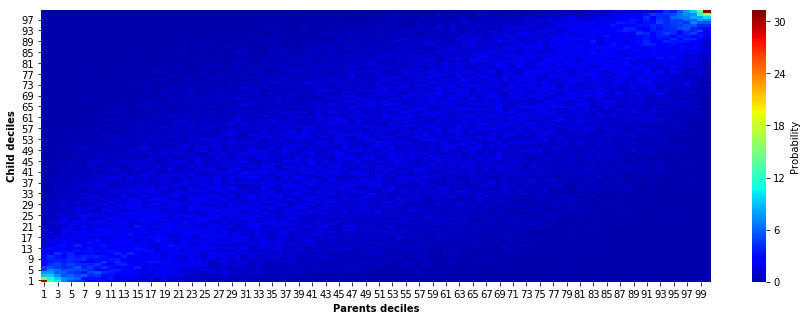

In [124]:
df_proba_COL=df_instructions1_count[df_instructions1_count['country']=='COL']

df=df_proba_COL.pivot_table('proba_percent','deci_parents', 'deci_child', fill_value=0)

plt.figure(figsize = (15,5))
ax=sns.heatmap(data=df,cbar=True,center=15,cmap='jet',cbar_kws={'label': 'Probability'})
ax.invert_yaxis()
ax.set_xlabel('Parents deciles', fontweight='bold')
ax.set_ylabel('Child deciles',fontweight='bold')
plt.show()

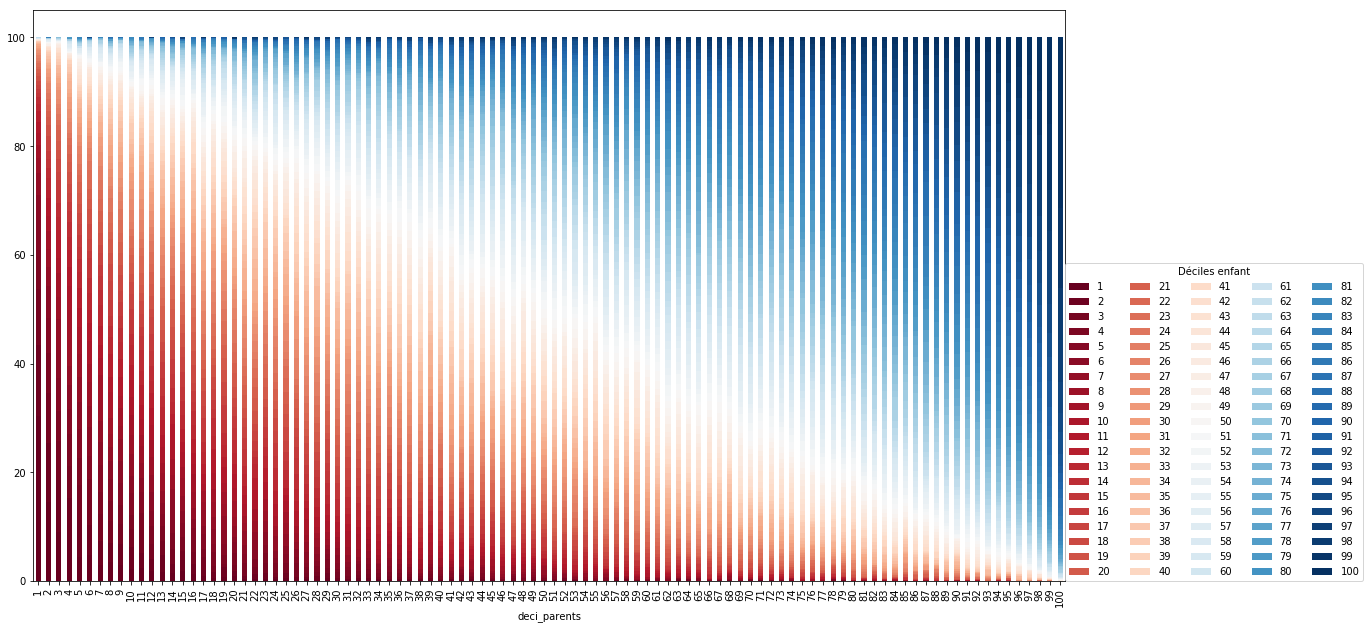

In [125]:
df=df_proba_COL.pivot_table('proba_percent','deci_parents', 'deci_child', fill_value=0)
ax = df.plot(kind='bar', stacked=True, figsize=(18.5, 10.5),colormap='RdBu')
plt.legend(loc=(1,0), bbox_to_anchor=(1,0), ncol=5, title='Déciles enfant')
plt.show()

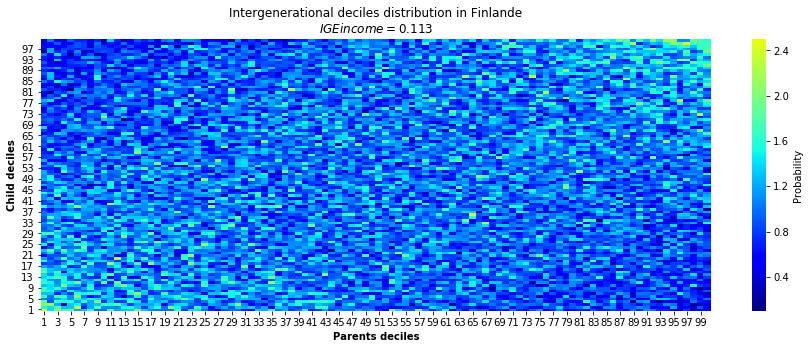

In [126]:
df_proba_FIN=df_instructions1_count[df_instructions1_count['country']=='FIN']

df=df_proba_FIN.pivot_table('proba_percent','deci_parents', 'deci_child', fill_value=0)

plt.figure(figsize = (15,5))
ax=sns.heatmap(data=df,cbar=True,center=2,cmap='jet',cbar_kws={'label': 'Probability'})
ax.invert_yaxis()
ax.set_xlabel('Parents deciles', fontweight='bold')
ax.set_ylabel('Child deciles',fontweight='bold')
ax.set_title(label='Intergenerational deciles distribution in Finlande\n$IGEincome={:.3f}$'.format(float(df_final.IGEincome[df_final['country']=='FIN'].values)))
plt.show()

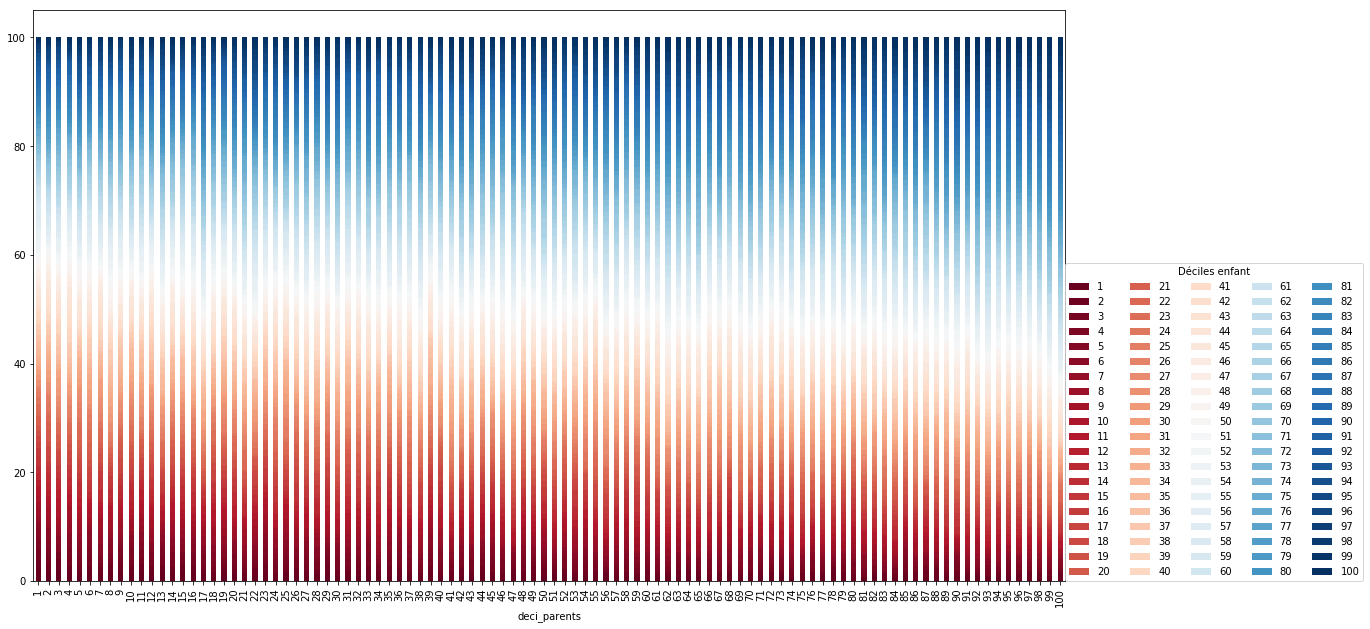

In [127]:
df=df_proba_FIN.pivot_table('proba_percent','deci_parents', 'deci_child', fill_value=0)
ax = df.plot(kind='bar', stacked=True, figsize=(18.5, 10.5),colormap='RdBu')
plt.legend(loc=(1,0), bbox_to_anchor=(1,0), ncol=5, title='Déciles enfant')
plt.show()

### <font color='orange'>Instructions 8 to 11 new sample<font>

In [128]:
df_world_income_distribution.head()

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0
3,ALB,2008,4,100,1086.90780,7297.0
4,ALB,2008,5,100,1132.69970,7297.0


In [129]:
df_new_sample = df_world_income_distribution[['country','quantile','income']][df_world_income_distribution['country'].isin(liste_country_reference)].copy()
df_new_sample = df_new_sample.rename(columns={'quantile':'c_parents'})
df_new_sample=df_new_sample.iloc[np.repeat(np.arange(len(df_new_sample)), 500)]

In [130]:
len(df_new_sample)

5650000

In [131]:
df_new_sample.head()

,country,c_parents,income
0,ALB,1,728.89795
0,ALB,1,728.89795
0,ALB,1,728.89795
0,ALB,1,728.89795
0,ALB,1,728.89795


### <font color='green'> So, we need to assign a 'c_child' for every 'c_parent', according to country probabilities<font>  
So we will start working with df_instructions1_count. It would have been quicker to work directly with the counter colonne (1/2) but some count%2=1...so we would probably have some issues to create exactly 500 individuals.

In [132]:
df_instructions1_count.head()

,country,deci_parents,deci_child,n_count,proba_percent
0,ALB,1,1,207,20.7
1,ALB,1,2,108,10.8
2,ALB,1,3,78,7.8
3,ALB,1,4,45,4.5
4,ALB,1,5,67,6.7


In [133]:
#find another way? a quicker?
liste_c_child=[]
for country, parents_deci in [(country,parents_deci) for country in liste_country_reference for parents_deci in np.arange(1,101,1)]:
    df=df_instructions1_count[(df_instructions1_count['country']==country) & (df_instructions1_count['deci_parents']==parents_deci)]
    liste_proba=list(df.proba_percent/100)
    z=np.random.choice(a=np.arange(1,101,1),size=500,p=liste_proba)
    for c in z:
        liste_c_child.append(c)

In [134]:
len(liste_c_child)

5650000

In [135]:
df_new_sample['c_child']=liste_c_child

In [136]:
df_new_sample=df_new_sample.rename(columns={'income':'parents_income'})
df_new_sample=df_new_sample.reset_index(drop=True)

In [137]:
df_new_sample.head()

,country,c_parents,parents_income,c_child
0,ALB,1,728.89795,5
1,ALB,1,728.89795,3
2,ALB,1,728.89795,17
3,ALB,1,728.89795,1
4,ALB,1,728.89795,2


In [138]:
#Determine child incomes, quick way: merging
df=df_new_sample[['country','c_parents','parents_income']].copy()
df=df.drop_duplicates()
df=df.reset_index(drop=True)
df=df.rename(columns={'parents_income':'child_income','c_parents':'c_child'})

df_analysis_sample=df_new_sample.merge(df, on=['country','c_child'],how='inner')
df_analysis_sample=df_analysis_sample.sort_values(by=['country','c_parents','c_child'])
df_analysis_sample=df_analysis_sample.reset_index(drop=True)

In [139]:
df_analysis_sample.iloc[[499,500,49999,50001],:]

,country,c_parents,parents_income,c_child,child_income
499,ALB,1,728.89795,79,3747.26760
500,ALB,2,916.66235,1,728.89795
49999,ALB,100,17754.32400,100,17754.32400
50001,ARG,1,254.08942,1,254.08942


### <font color='green'> It looks pretty good<font>

# <font color='blue'>MISSION 4<font>

In [140]:
df_baseline.head()

,country,IGEincome,GINI,gdpppp
0,ALB,0.815874,29.0,7297.0
1,AUT,0.245267,30.5,36193.0
2,BEL,0.183176,27.7,33561.0
3,BIH,0.827252,32.7,7472.0
4,BLR,0.342738,27.0,11651.0


In [141]:
df_mission_4 = df_analysis_sample.merge(df_baseline, on='country')
df_mission_4.head()

,country,c_parents,parents_income,c_child,child_income,IGEincome,GINI,gdpppp
0,ALB,1,728.89795,1,728.89795,0.815874,29.0,7297.0
1,ALB,1,728.89795,1,728.89795,0.815874,29.0,7297.0
2,ALB,1,728.89795,1,728.89795,0.815874,29.0,7297.0
3,ALB,1,728.89795,1,728.89795,0.815874,29.0,7297.0
4,ALB,1,728.89795,1,728.89795,0.815874,29.0,7297.0


In [142]:
len(df_mission_4)

5650000

In [143]:
df_mission_4.dtypes

country            object
c_parents           int64
parents_income    float64
c_child             int64
child_income      float64
IGEincome         float64
GINI              float64
gdpppp            float64
dtype: object

In [144]:
df_mission_4.describe()

,c_parents,parents_income,c_child,child_income,IGEincome,GINI,gdpppp
count,5.650000e+06,5.650000e+06,5.650000e+06,5.650000e+06,5.650000e+06,5.650000e+06,5.650000e+06
mean,5.050000e+01,6.195062e+03,5.048823e+01,6.192459e+03,5.462431e-01,3.656726e+01,1.260382e+04
std,2.886607e+01,9.503408e+03,2.886420e+01,9.486960e+03,2.266889e-01,8.239356e+00,1.322594e+04
min,1.000000e+00,1.671942e+01,1.000000e+00,1.671942e+01,1.128757e-01,3.800000e+00,3.031931e+02
25%,2.575000e+01,9.213209e+02,2.600000e+01,9.206766e+02,3.528712e-01,3.190000e+01,2.576000e+03
50%,5.050000e+01,2.501612e+03,5.000000e+01,2.501505e+03,5.173975e-01,3.540000e+01,7.560000e+03
75%,7.525000e+01,7.769607e+03,7.500000e+01,7.769510e+03,6.616545e-01,4.190000e+01,1.800400e+04
max,1.000000e+02,1.769285e+05,1.000000e+02,1.769285e+05,1.095440e+00,6.300000e+01,7.312700e+04


## <font color='orange'>ANOVA</font>

### <font color='red'>The ANOVA test has important assumptions ON RESIDUALS that must be satisfied (some are also important for linear regression):<font>

    Independent,
    normally distributed,
    homoscedasticity.

In [145]:
#Vérification: absence de valeurs type 'NaN'
df_mission_4.isna().sum()

country           0
c_parents         0
parents_income    0
c_child           0
child_income      0
IGEincome         0
GINI              0
gdpppp            0
dtype: int64

In [146]:
list_manova = ['IGEincome','GINI','gdpppp','c_parents','child_income']

random_from = df_mission_4.sample(frac=0.1)#keep a 10% sample of DataFrame (randomly)

In [147]:
def eta_squared(df,quality,quanti_columns):
    if type(quanti_columns) is list:
        for col in quanti_columns:
            classes = []
            moyenne_y = df['{}'.format(col)].mean()
            for classe in df['{}'.format(quality)].unique():
                yi_classe = df['{}'.format(col)][df['{}'.format(quality)]==classe]
                classes.append({'ni': len(yi_classe),
                                'moyenne_classe': yi_classe.mean()})
            SCT = sum([(yj-moyenne_y)**2 for yj in df['{}'.format(col)]])
            SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
            eta = SCE/SCT
            print('{} et {}:{}'.format(quality,col,eta))
    else:
        print('no quantitative list')

In [148]:
eta_squared(random_from,'country',list_manova)

country et IGEincome:0.9999999999992961
country et GINI:0.9999999999999886
country et gdpppp:0.9999999999999669
country et c_parents:0.0001684373779289503
country et child_income:0.49333745085378666


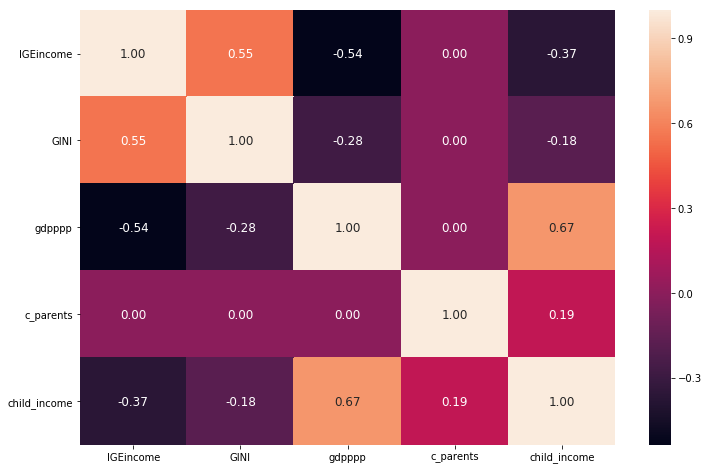

In [149]:
#PEARSON
plt.figure(figsize=(12,8))
sns.heatmap(random_from[list_manova].corr(), annot=True, fmt=".2f",annot_kws={'size':12})
plt.yticks(rotation=0)
plt.savefig('./graphiques/heatmap_corr.png', dpi=120)
plt.show()

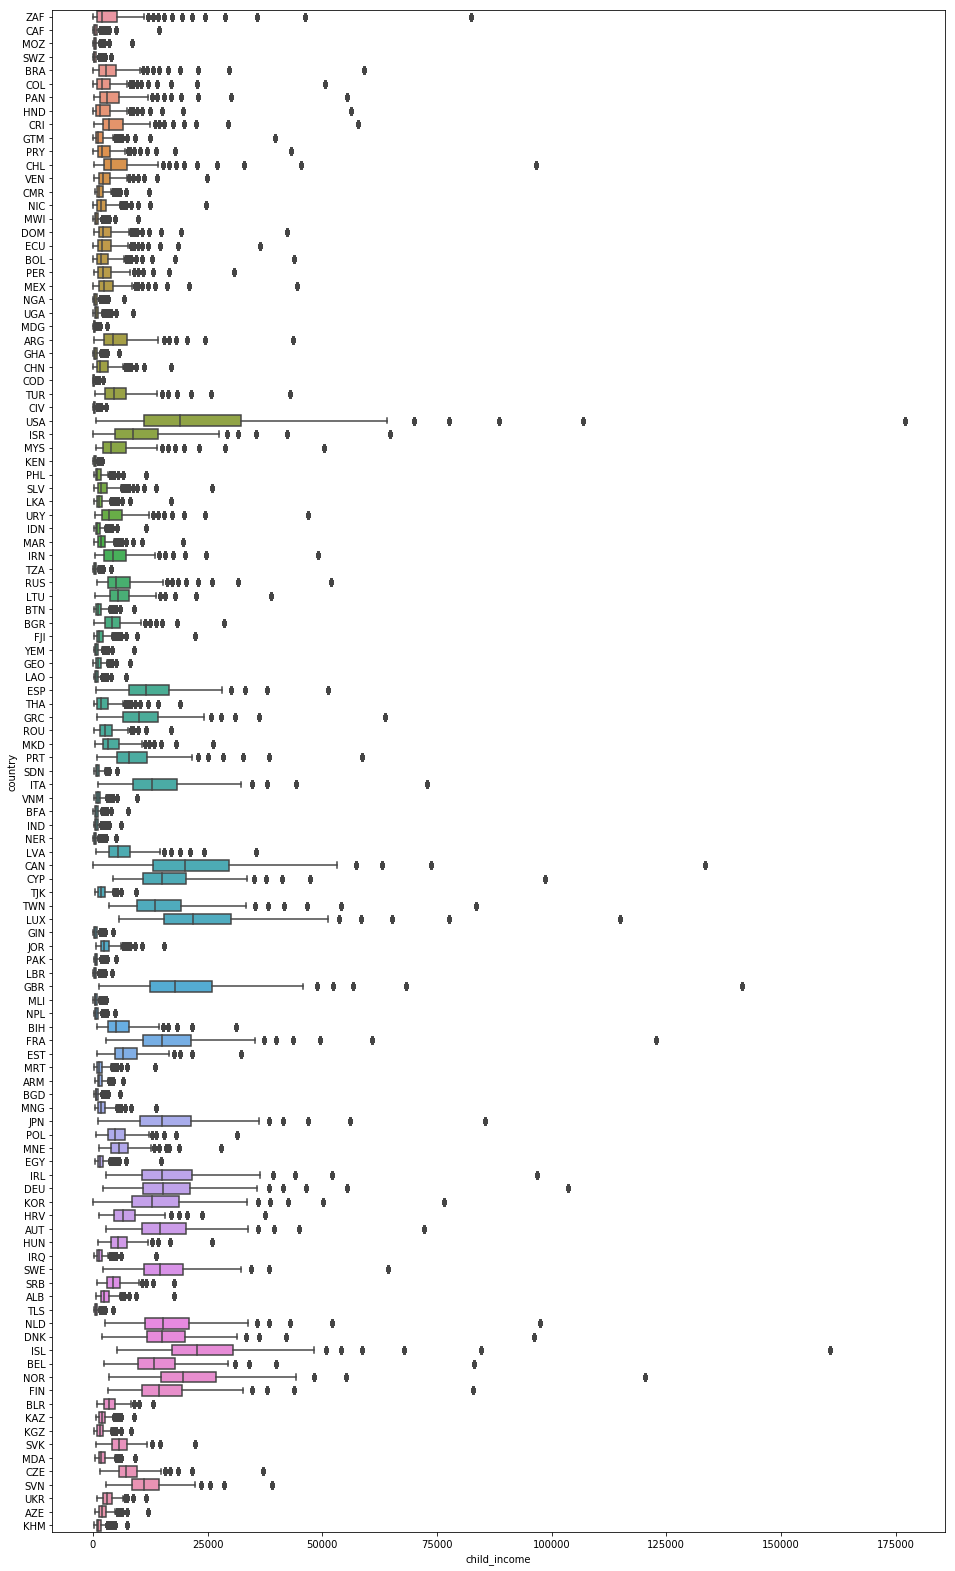

In [150]:
list_order=list(df_mission_4.sort_values(by='GINI',ascending=False).country.unique())

plt.figure(figsize=(16,28))
sns.boxplot(y='country',x='child_income', data=random_from, orient='h', order=list_order);

In [151]:
#null hypothesis: country does not influence child_income
st.f_oneway(*(random_from[random_from['country'] == country]['child_income'] for country in liste_country_reference))

F_onewayResult(statistic=4910.9876179983303, pvalue=0.0)

#### <font color='red'> Countries influences child_income<font>

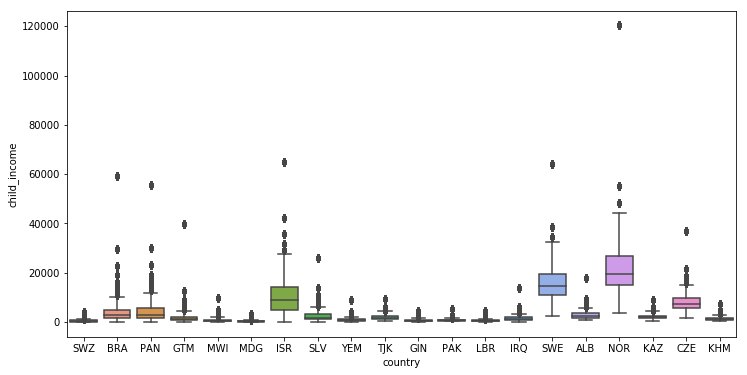

In [152]:
list_order=random.sample(liste_country_reference,20)
random_df_mission_4 = df_mission_4[df_mission_4['country'].isin(list_order)]
list_order=list(random_df_mission_4.sort_values(by='GINI',ascending=False).country.unique())
plt.figure(figsize=(12,6))
sns.boxplot(x='country',y='child_income', data=random_from, orient='v', order=list_order);

In [153]:
#null hypothesis: country does not influence child_income
st.f_oneway(*(random_df_mission_4[random_df_mission_4['country'] == country]['child_income'] for country in list_order))

F_onewayResult(statistic=68206.739838089561, pvalue=0.0)

In [154]:
results = smf.ols('child_income ~ country', data=random_from).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           child_income   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     4911.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:51:19   Log-Likelihood:            -5.7843e+06
No. Observations:              565000   AIC:                         1.157e+07
Df Residuals:                  564887   BIC:                         1.157e+07
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2984.5348     96.963     30.780      0.000    2794.491    3174.579
country[T.ARG]  2991.0326    136.556     21.903      0.000    2723.387    3258.678
country[T.ARM] -1370.1642    136.495    -10.038      0.000   -1637.689   -1102.639
country[T.AUT]  1.377e+04    135.870    101.341      0.000    1.35e+04     1.4e+04
country[T.AZE]  -619.9121    135.883     -4.562      0.000    -886.239    -353.585
country[T.BEL]  1.208e+04    135.738     88.963      0.000    1.18e+04    1.23e+04
country[T.BFA] -2042.2105    136.332    -14.980      0.000   -2309.416   -1775.005
country[T.BGD] -1984.6369    136.563    -14.533      0.000   -2252.296   -1716.978
country[T.BGR]  2003.5597    136.076     14.724      0.000    1736.855    2270.264
country[T.BIH]  3287.3609    135.916     24.187      0.000    3020.969    3553.753
country[T.BLR]   971.4868    135.510      7.169      0.000     705.891    1237.082
country[T.BOL]    13.4151    136.217      0.098      0.922    -253.566     280.396
country[T.BRA]  1656.7358    136.277     12.157      0.000    1389.636    1923.835
country[T.BTN] -1441.0852    136.950    -10.523      0.000   -1709.504   -1172.667
country[T.CAF] -2182.6304    135.950    -16.055      0.000   -2449.087   -1916.174
country[T.CAN]  2.084e+04    136.183    153.022      0.000    2.06e+04    2.11e+04
country[T.CHL]  4145.5414    135.725     30.544      0.000    3879.524    4411.559
country[T.CHN]  -510.8273    136.109     -3.753      0.000    -777.598    -244.057
country[T.CIV] -2588.1322    136.023    -19.027      0.000   -2854.732   -2321.532
country[T.CMR] -1202.7651    135.936     -8.848      0.000   -1469.196    -936.334
country[T.COD] -2710.0095    135.680    -19.974      0.000   -2975.937   -2444.082
country[T.COL]   457.9829    136.103      3.365      0.001     191.226     724.740
country[T.CRI]  2687.3604    136.023     19.757      0.000    2420.760    2953.961
country[T.CYP]  1.439e+04    136.770    105.214      0.000    1.41e+04    1.47e+04
country[T.CZE]  5290.7890    136.735     38.694      0.000    5022.793    5558.785
country[T.DEU]  1.514e+04    136.345    111.061      0.000    1.49e+04    1.54e+04
country[T.DNK]  1.408e+04    135.844    103.681      0.000    1.38e+04    1.44e+04
country[T.DOM]   600.5963    136.529      4.399      0.000     333.004     868.188
country[T.ECU]   361.2938    136.372      2.649      0.008      94.009     628.579
country[T.EGY] -1036.0896    135.903     -7.624      0.000   -1302.456    -769.724
country[T.ESP]  1.012e+04    136.481     74.173      0.000    9855.666    1.04e+04
country[T.EST]  4759.9813    135.627     35.096      0.000    4494.156    5025.806
country[T.FIN]  1.352e+04    136.190     99.292      0.000    1.33e+04    1.38e+04
country[T.FJI]  -890.0133    136.096     -6.540      0.000   -1156.757    -623.269
country[T.FR

In [155]:
aov_table = sm.stats.anova_lm(results, typ=1)
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
country,2.514266e+13,112.0,2.244880e+11,4910.987618,0.0,0.493337,0.493237
Residual,2.582176e+13,564887.0,4.571137e+07,NaN,NaN,NaN,NaN


In [156]:
results.diagn

{'jb': 199569001.13610977,
 'jbpv': 0.0,
 'skew': 6.688646564800835,
 'kurtosis': 94.09508951321915,
 'omni': 707833.86390631914,
 'omnipv': 0.0,
 'condno': 115.58406015889385,
 'mineigval': 42.66267154098405}

In [157]:
st.normaltest(a=results.resid)

NormaltestResult(statistic=707833.86390631914, pvalue=0.0)

### <font color='red'>Normality tests (Jarque Berra & normaltest-Shapiro) are not significant, normality distribution of residuals can be rejected. Wich is not good for ANOVA assumptions<font>
### <font color='red'>Homoscedasticity test (Omnibus) is also not significant, homoscedascity can be rejected. Wich is not good for ANOVA assumptions<font>
### <font color='red'>Multicolinearity test (Condno) is significant (>20), multicolinearity can't be rejected. Wich is not good for ANOVA assumptions<font>
### <font color='green'>Autocorelation test (Durbin-Watson) is significant (~ 2), residuals are not autocorelated. Wich is good for ANOVA assumptions<font>

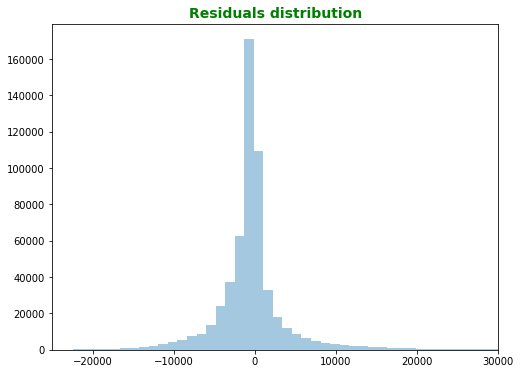

In [158]:
plt.figure(figsize=(8,6))
sns.distplot(results.resid, bins=150, kde=False)
plt.title('Residuals distribution', fontsize=14, fontweight='bold', color='green')
plt.xlim(-25000,30000)
plt.show()

## <font color='orange'>REGRESSION LINEAIRE (sans transofrmation)<font>

In [159]:
random_from = df_mission_4.sample(frac=0.1)#on 10% of the DataFrame to relieve the model
random_from=random_from.sort_index(axis=0)#reorder via index (no impact, just for display facilities)
random_from=random_from.drop(columns='country')

#### <font color ='blue'> Explicated variable=inc_child, independanced variables = gdpppp and GINI<font>

In [160]:
mod = smf.ols('child_income ~ gdpppp+GINI',data=random_from ).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           child_income   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 2.277e+05
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:51:49   Log-Likelihood:            -5.8079e+06
No. Observations:              565000   AIC:                         1.162e+07
Df Residuals:                  564997   BIC:                         1.162e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.0433     47.722      0.944      0.345     -48.490     138.576
gdpppp         0.4798      0.001    648.988      0.000       0.478       0.481
GINI           2.7818      1.185      2.347      0.019       0.459       5.105
==============================================================================
Omnibus:                   690320.552   Durbin-Watson:                   0.497
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        172769436.274
Skew:                           6.421   Prob(JB):                         0.00
Kurtosis:                      87.699   Cond. No.                     9.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [161]:
aov_table = sm.stats.anova_lm(mod, typ=2)

SST = aov_table.sum()[0]
for col,SSF in zip(aov_table.axes[0], aov_table.sum_sq):
    percent=100*(SSF/SST)
    print('''La variable {} contribue pour {:.2f}% de la variance expliquée par le modèle.\n'''.format(col,percent))
aov_table

La variable gdpppp contribue pour 42.71% de la variance expliquée par le modèle.

La variable GINI contribue pour 0.00% de la variance expliquée par le modèle.

La variable Residual contribue pour 57.29% de la variance expliquée par le modèle.



,sum_sq,df,F,PR(>F)
gdpppp,2.092412e+13,1.0,421185.810548,0.000000
GINI,2.737077e+08,1.0,5.509517,0.018914
Residual,2.806853e+13,564997.0,NaN,NaN


#### <font color='blue'> With log variables<font>

In [162]:
mod = smf.ols('np.log(child_income) ~ np.log(gdpppp)+GINI',data=random_from ).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(child_income)   R-squared:                       0.661
Model:                              OLS   Adj. R-squared:                  0.661
Method:                   Least Squares   F-statistic:                 5.504e+05
Date:                  Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                          16:51:49   Log-Likelihood:            -6.8001e+05
No. Observations:                565000   AIC:                         1.360e+06
Df Residuals:                    564997   BIC:                         1.360e+06
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8529      0.010     84.461      0.000       0.833       0.873
np.log(gdpppp)     0.8683      0.001    986.265      0.000       0.867       0.870
GINI              -0.0173      0.000   -129.185      0.000      -0.018      -0.017
==============================================================================
Omnibus:                    22519.133   Durbin-Watson:                   0.308
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66744.783
Skew:                          -0.122   Prob(JB):                         0.00
Kurtosis:                       4.666   Cond. No.                         363.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
aov_table = sm.stats.anova_lm(mod, typ=2)

SST = aov_table.sum()[0]
for col,SSF in zip(aov_table.axes[0], aov_table.sum_sq):
    percent=100*(SSF/SST)
    print('''La variable {} contribue pour {:.2f}% de la variance expliquée par le modèle.\n'''.format(col,percent))
aov_table

La variable np.log(gdpppp) contribue pour 62.58% de la variance expliquée par le modèle.

La variable GINI contribue pour 1.07% de la variance expliquée par le modèle.

La variable Residual contribue pour 36.35% de la variance expliquée par le modèle.



,sum_sq,df,F,PR(>F)
np.log(gdpppp),632292.642106,1.0,972717.823640,0.0
GINI,10848.183230,1.0,16688.824887,0.0
Residual,367263.184893,564997.0,NaN,NaN


#### <font color ='blue'>Adding an independanced variable: IGEincome<font>

In [164]:
mod = smf.ols('child_income ~ gdpppp+GINI+IGEincome',data=random_from ).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           child_income   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.519e+05
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:51:49   Log-Likelihood:            -5.8079e+06
No. Observations:              565000   AIC:                         1.162e+07
Df Residuals:                  564996   BIC:                         1.162e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    164.3358     49.019      3.353      0.001      68.261     260.411
gdpppp         0.4755      0.001    564.778      0.000       0.474       0.477
GINI           9.9574      1.364      7.301      0.000       7.284      12.630
IGEincome   -599.8168     56.426    -10.630      0.000    -710.410    -489.224
==============================================================================
Omnibus:                   690712.968   Durbin-Watson:                   0.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        173127162.834
Skew:                           6.427   Prob(JB):                         0.00
Kurtosis:                      87.787   Cond. No.                     1.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
aov_table = sm.stats.anova_lm(mod, typ=2)

SST = aov_table.sum()[0]
for col,SSF in zip(aov_table.axes[0], aov_table.sum_sq):
    percent=100*(SSF/SST)
    print('''La variable {} contribue pour {:.2f}% de la variance expliquée par le modèle.\n'''.format(col,percent))
aov_table

La variable gdpppp contribue pour 36.08% de la variance expliquée par le modèle.

La variable GINI contribue pour 0.01% de la variance expliquée par le modèle.

La variable IGEincome contribue pour 0.01% de la variance expliquée par le modèle.

La variable Residual contribue pour 63.90% de la variance expliquée par le modèle.



,sum_sq,df,F,PR(>F)
gdpppp,1.584320e+13,1.0,318974.066527,0.000000e+00
GINI,2.647738e+09,1.0,53.307412,2.856006e-13
IGEincome,5.612655e+09,1.0,113.000646,2.169482e-26
Residual,2.806292e+13,564996.0,NaN,NaN


In [166]:
mod = smf.ols('np.log(child_income) ~ np.log(gdpppp)+GINI+IGEincome',data=random_from ).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(child_income)   R-squared:                       0.662
Model:                              OLS   Adj. R-squared:                  0.662
Method:                   Least Squares   F-statistic:                 3.684e+05
Date:                  Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                          16:51:50   Log-Likelihood:            -6.7926e+05
No. Observations:                565000   AIC:                         1.359e+06
Df Residuals:                    564996   BIC:                         1.359e+06
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0024      0.011     92.882      0.000       0.981       1.024
np.log(gdpppp)     0.8532      0.001    888.107      0.000       0.851       0.855
GINI              -0.0141      0.000    -90.644      0.000      -0.014      -0.014
IGEincome         -0.2406      0.006    -38.897      0.000      -0.253      -0.228
==============================================================================
Omnibus:                    22692.281   Durbin-Watson:                   0.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68293.061
Skew:                          -0.115   Prob(JB):                         0.00
Kurtosis:                       4.688   Cond. No.                         400.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
aov_table = sm.stats.anova_lm(mod, typ=2)

SST = aov_table.sum()[0]
for col,SSF in zip(aov_table.axes[0], aov_table.sum_sq):
    percent=100*(SSF/SST)
    print('''La variable {} contribue pour {:.2f}% de la variance expliquée par le modèle.\n'''.format(col,percent))
aov_table

La variable np.log(gdpppp) contribue pour 57.85% de la variance expliquée par le modèle.

La variable GINI contribue pour 0.60% de la variance expliquée par le modèle.

La variable IGEincome contribue pour 0.11% de la variance expliquée par le modèle.

La variable Residual contribue pour 41.44% de la variance expliquée par le modèle.



,sum_sq,df,F,PR(>F)
np.log(gdpppp),511329.747412,1.0,788733.797324,0.0
GINI,5326.545380,1.0,8216.276063,0.0
IGEincome,980.843565,1.0,1512.965896,0.0
Residual,366282.341328,564996.0,NaN,NaN


### <font color='green'> IGEincome (intergenerational elasticity) does not seem to be relevant for our mode<font>

#### <font color='blue'>Adding an independanced variable: parents_income (referes to class income)<font<>

In [168]:
mod = smf.ols('child_income ~ gdpppp+GINI+IGEincome+parents_income',data=random_from ).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           child_income   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                 1.803e+05
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:51:50   Log-Likelihood:            -5.7425e+06
No. Observations:              565000   AIC:                         1.149e+07
Df Residuals:                  564995   BIC:                         1.149e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         74.8728     43.669      1.715      0.086     -10.716     160.462
gdpppp             0.2588      0.001    275.610      0.000       0.257       0.261
GINI               5.3250      1.215      4.383      0.000       2.944       7.706
IGEincome       -288.8827     50.273     -5.746      0.000    -387.416    -190.349
parents_income     0.4554      0.001    383.331      0.000       0.453       0.458
==============================================================================
Omnibus:                   672693.605   Durbin-Watson:                   0.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        188951176.121
Skew:                           6.057   Prob(JB):                         0.00
Kurtosis:                      91.766   Cond. No.                     1.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [169]:
aov_table = sm.stats.anova_lm(mod, typ=2)

SST = aov_table.sum()[0]
for col,SSF in zip(aov_table.axes[0], aov_table.sum_sq):
    percent=100*(SSF/SST)
    print('''La variable {} contribue pour {:.2f}% de la variance expliquée par le modèle.\n'''.format(col,percent))
aov_table

La variable gdpppp contribue pour 9.64% de la variance expliquée par le modèle.

La variable GINI contribue pour 0.00% de la variance expliquée par le modèle.

La variable IGEincome contribue pour 0.00% de la variance expliquée par le modèle.

La variable parents_income contribue pour 18.65% de la variance expliquée par le modèle.

La variable Residual contribue pour 71.70% de la variance expliquée par le modèle.



,sum_sq,df,F,PR(>F)
gdpppp,2.994199e+12,1.0,75960.879653,0.000000e+00
GINI,7.571374e+08,1.0,19.208084,1.172370e-05
IGEincome,1.301550e+09,1.0,33.019489,9.128635e-09
parents_income,5.792144e+12,1.0,146942.925892,0.000000e+00
Residual,2.227077e+13,564995.0,NaN,NaN


In [170]:
mod = smf.ols('np.log(child_income) ~ np.log(gdpppp)+GINI+IGEincome+np.log(parents_income)',data=random_from ).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(child_income)   R-squared:                       0.764
Model:                              OLS   Adj. R-squared:                  0.764
Method:                   Least Squares   F-statistic:                 4.577e+05
Date:                  Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                          16:51:51   Log-Likelihood:            -5.7736e+05
No. Observations:                565000   AIC:                         1.155e+06
Df Residuals:                    564995   BIC:                         1.155e+06
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.4451      0.009     49.013      0.000       0.427       0.463
np.log(gdpppp)             0.3832      0.001    308.439      0.000       0.381       0.386
GINI                      -0.0064      0.000    -48.972      0.000      -0.007      -0.006
IGEincome                 -0.0998      0.005    -19.287      0.000      -0.110      -0.090
np.log(parents_income)     0.5513      0.001    495.380      0.000       0.549       0.554
==============================================================================
Omnibus:                    33277.157   Durbin-Watson:                   0.443
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           144597.810
Skew:                          -0.070   Prob(JB):                         0.00
Kurtosis:                       5.474   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
aov_table = sm.stats.anova_lm(mod, typ=2)

SST = aov_table.sum()[0]
for col,SSF in zip(aov_table.axes[0], aov_table.sum_sq):
    percent=100*(SSF/SST)
    print('''La variable {} contribue pour {:.2f}% de la variance expliquée par le modèle.\n'''.format(col,percent))
aov_table

La variable np.log(gdpppp) contribue pour 10.47% de la variance expliquée par le modèle.

La variable GINI contribue pour 0.26% de la variance expliquée par le modèle.

La variable IGEincome contribue pour 0.04% de la variance expliquée par le modèle.

La variable np.log(parents_income) contribue pour 27.02% de la variance expliquée par le modèle.

La variable Residual contribue pour 62.20% de la variance expliquée par le modèle.



,sum_sq,df,F,PR(>F)
np.log(gdpppp),42998.921948,1.0,95134.674069,0.000000e+00
GINI,1083.954602,1.0,2398.238445,0.000000e+00
IGEincome,168.132229,1.0,371.990833,7.335908e-83
np.log(parents_income),110916.186522,1.0,245400.925787,0.000000e+00
Residual,255366.154806,564995.0,NaN,NaN


### <font color='green'>Log gdpppp abd parents_income seem to be the most relevant<font>
### <font color='green'> However IGEincome (intergenerational elasticity) and seem to be unrelevant<font>

In [172]:
random_from['log_gdpppp']=np.log(random_from['gdpppp'])
random_from['log_parents_income']=np.log(random_from['parents_income'])
random_from['log_child_income']=np.log(random_from['child_income'])

In [173]:
#graphic illustration of the linear regression
random_from_reduce = random_from.sample(frac=0.0001).copy()

In [174]:
mod = smf.ols('child_income ~ gdpppp+GINI+IGEincome+parents_income',data=random_from ).fit()

truth=list(random_from_reduce['child_income'])

preds=list(mod.predict(random_from_reduce[['IGEincome','gdpppp','parents_income','GINI']]))


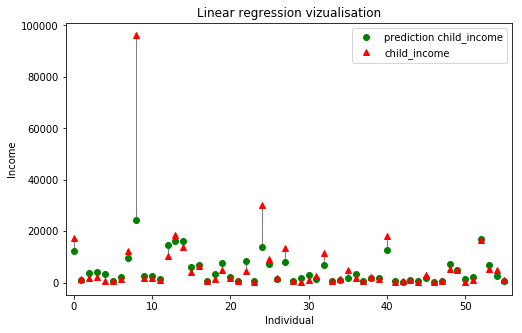

In [175]:
plt.rcParams['legend.numpoints'] = 1

fig, ax = plt.subplots(figsize=(8,5))

for i in range(len(preds)):
    ax.plot([i,i],[preds[i], truth[i]], c="k", linewidth=0.5)
ax.plot(preds,'o', label='prediction child_income', color = 'g')
ax.plot(truth,'^', label='child_income', color = 'r' )

ax.set_xlim((-1,len(preds)))
plt.xlabel('Individual')
plt.ylabel('Income')
plt.title('Linear regression vizualisation')
plt.legend(loc='best')

plt.show()


In [176]:
mod = smf.ols('log_child_income ~ log_gdpppp+GINI+IGEincome+log_parents_income',data=random_from ).fit()

truth=list(random_from_reduce['log_child_income'])

preds=list(mod.predict(random_from_reduce[['IGEincome','log_gdpppp','log_parents_income','GINI']]))

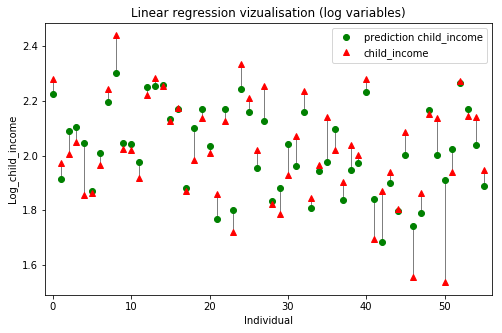

In [177]:
plt.rcParams['legend.numpoints'] = 1

log_truth=np.log(truth)
log_preds=np.log(preds)

fig, ax = plt.subplots(figsize=(8,5))

for i in range(len(log_preds)):
    ax.plot([i,i],[log_preds[i], log_truth[i]], c="k", linewidth=0.5)
ax.plot(log_preds,'o', label='prediction child_income', color = 'g')
ax.plot(log_truth,'^', label='child_income', color = 'r' )

ax.set_xlim((-1,len(preds)))
plt.xlabel('Individual')
plt.ylabel('Log_child_income')
plt.title('Linear regression vizualisation (log variables)')
plt.legend(loc='best')

plt.show()


### <font color='orange'>ASSUMPTIONS OF LINEAR REGRESSION<font>
**Linear regression has five assumptions:**  

    Linear relationship
    Homoscedasticity 
    Multivariate normality
    No or little multicollinearity
    No auto-correlation 


#### <font color='b'>LINEAR RELATIONSHIP<font>  
Linear regression needs the relationship between the independent and dependent variables to be linear.

In [178]:
mod = smf.ols('log_child_income ~ log_gdpppp+GINI+IGEincome+log_parents_income',data=random_from ).fit()
mod.rsquared,mod.rsquared_adj

(0.76416562350951156, 0.76416395387083158)

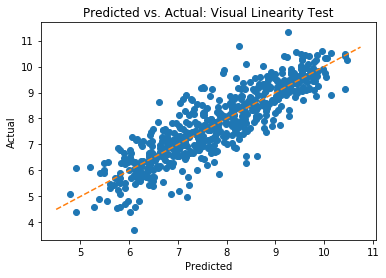

In [179]:
#graphic illustration of the linear regression
random_from_reduce2 = random_from.sample(frac=0.001).copy()
truth2=list(random_from_reduce2['log_child_income'])

preds2=list(mod.predict(random_from_reduce2[['IGEincome','log_gdpppp','log_parents_income','GINI']]))


def abline(slope, intercept):
    """Plot a line from slope and intercept, borrowed from https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')


plt.plot(preds2,truth2,'o')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs. Actual: Visual Linearity Test')
abline(1,0)
plt.show()



### <font color='red'>It does not look good,...we can expect a violation of linearity. And the Harvey-Collier test probably won't run.<font>

In [180]:
name = ['t value', 'p value']
try:
    test = sms.linear_harvey_collier(mod)
    lzip(name, test)
except:
    print('''As expected, test can't run.''')

/usr/local/lib/python3.6/dist-packages/statsmodels/sandbox/stats/diagnostic.py:1221: RuntimeWarning: invalid value encountered in sqrt
  rresid_scaled = rresid/np.sqrt(rvarraw)   #this is N(0,sigma2) distributed


#### <font color='b'>HOMOSCEDASTICITY<font>

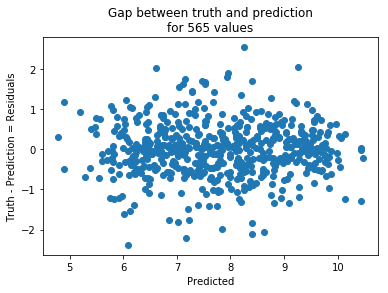

In [181]:
plt.plot(preds2,np.array(truth2)-np.array(preds2),'o')
plt.xlabel('Predicted')
plt.ylabel('Truth - Prediction = Residuals')
plt.title('Gap between truth and prediction\nfor {} values'.format(len(preds2)))
plt.show()

In [182]:
# Heteroscédasticity Test: constant variance of the residuals
#Null hypothesis: homoscédasticity can't be rejected

fval,pval=statsmodels.stats.diagnostic.het_breuschpagan(mod.resid, mod.model.exog)[2:]
print('F =',fval,'\nP =',pval)
if pval<0.05:
    print('''L'hypothèse nulle d'homoscédasticité des résidus peut être rejettée: trop peu probable d'obtenir une telle valeur F dans l'hypothèse d'homoscédasticité des résidus.\nNOUS POUVONS CONSIDERER QU'IL Y A HETEROSCEDASTICITE.''')
else:
    print('''L'hypothèse nulle d'homoscédasticité des résidus ne peut pas être rejettée: car, nous avons une probabilité sgnificative d'avoir une telle valeur statistique F dans l'hypothèse d'homoscédasticité des résidus'''.format(pval,fval))

F = 7079.85747584 
P = 0.0
L'hypothèse nulle d'homoscédasticité des résidus peut être rejettée: trop peu probable d'obtenir une telle valeur F dans l'hypothèse d'homoscédasticité des résidus.
NOUS POUVONS CONSIDERER QU'IL Y A HETEROSCEDASTICITE.


#### <font color='b'>GAUSSIAN DISTRIBUTION OF RESIDUALS</font> 

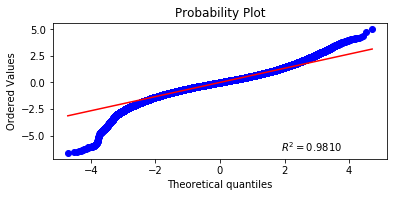

In [183]:
#Generates a probability plot of sample data against the quantiles of a specified theoretical distribution (the normal distribution by default)
fig, ax = plt.subplots(figsize=(6,2.5))
scipy.stats.probplot(mod.resid, plot=ax, fit=True, rvalue=True)
plt.show()

In [184]:
#Null Hypothesis: gaussian can't be rejected
st.normaltest(a=mod.resid)

NormaltestResult(statistic=33277.15728752852, pvalue=0.0)

In [185]:
#Null Hypothesis: gaussian can't be rejected
st.normaltest(a=np.round(mod.resid,2))

NormaltestResult(statistic=33279.04813184002, pvalue=0.0)

#### <font color='b'>NO CORRELATION</font>  

In [186]:
#Null Hypothesis: no correlation -> ~1.9<dw<2.1~
dw=statsmodels.stats.stattools.durbin_watson(mod.resid)
if 1.9<dw<2.1:
    print('''La valeur statistique du test de Durbin-Watson est de {:.3f}\nL'hypothèse nulle ne peut être rejetée'''.format(dw))
elif dw<1.9:
    print('''La valeur statistique du test de Durbin-Watson est de {:.3f}\nL'hypothèse nulle peut être rejetée car il semble y avoir une corrélation positive'''.format(dw))
elif dw>2.1:
    print('''La valeur statistique du test de Durbin-Watson est de {:.3f}\nL'hypothèse nulle peut être rejetée car il semble y avoir une corrélation négative'''.format(dw))

La valeur statistique du test de Durbin-Watson est de 0.443
L'hypothèse nulle peut être rejetée car il semble y avoir une corrélation positive


In [187]:
np.linalg.cond(mod.model.exog)

410.31351717590371

### <font color='red'> Linear Regression is more efficient with log features<font>
### <font color='blue'>GINI and IGEincome contain pretty much the same variance.<font>

In [188]:
# ACP (untransformed features)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [189]:
random_from_CR = scaler.fit_transform(random_from[['parents_income','IGEincome','GINI','gdpppp']])
random_from_CR = pd.DataFrame(random_from_CR, columns=['parents_income','IGEincome','GINI','gdpppp'])

In [190]:
random_from_CR.head()

,parents_income,IGEincome,GINI,gdpppp
0,-0.576301,1.188621,-0.91976,-0.400962
1,-0.576301,1.188621,-0.91976,-0.400962
2,-0.576301,1.188621,-0.91976,-0.400962
3,-0.576301,1.188621,-0.91976,-0.400962
4,-0.576301,1.188621,-0.91976,-0.400962


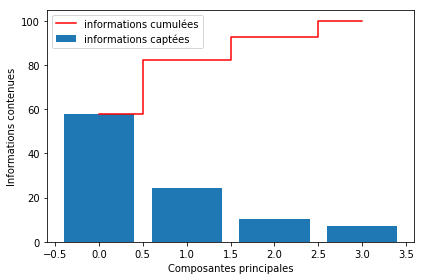

In [191]:
pca = PCA().fit(random_from_CR)
PCs = pca.components_ #Principal axes in feature space, representing the directions of maximum variance in the data.
PCe = pca.explained_variance_ratio_ #Percentage of variance explained by each of the selected variable.
PCsv = pca.singular_values_
PCn = pca.n_components_
PCm = pca.mean_
scree = pca.explained_variance_ratio_*100
cum_scree = np.cumsum(scree)

plt.bar(range(PCn),scree, alpha=1, align='center', label='informations captées')
plt.step(range(PCn), cum_scree, where='mid', label='informations cumulées', color='red')
plt.ylabel('Informations contenues')
plt.xlabel('Composantes principales')
plt.legend(loc='best')
plt.savefig('./graphiques/éboulis.png', dpi=120)
plt.tight_layout()

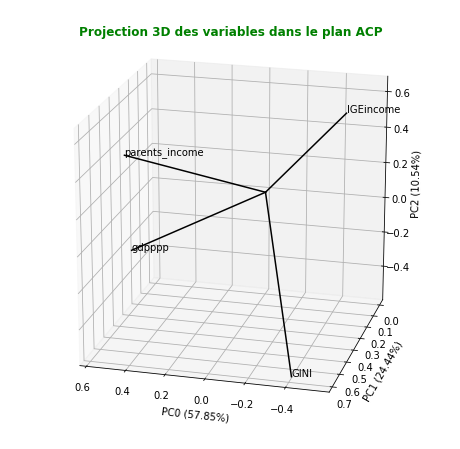

Inertie respective des variables sur les principales composantes:
      parents_income  IGEincome    GINI  gdpppp
PC0          0.4893    -0.5346 -0.4094  0.5542
PC1          0.5385     0.3299  0.6904  0.3528
PC2          0.4511     0.6592 -0.5723 -0.1852
PC3          0.5167    -0.4132  0.1679 -0.7308


In [192]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

nrange= len(random_from_CR.columns)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for i, (x, y,z) in enumerate(zip(PCs[0, :], PCs[1, :],PCs[2, :])):
    ax.plot([0, x], [0, y],[0,z], color='k')
    ax.text(x,y,z, random_from_CR.columns[i])
ax.view_init(20,105)
ax.set_xlabel('PC0 ({:.2f}%)'.format(PCe[0]*100))
ax.set_ylabel('PC1 ({:.2f}%)'.format(PCe[1]*100))
ax.set_zlabel('PC2 ({:.2f}%)'.format(PCe[2]*100))
ax.set_title('Projection 3D des variables dans le plan ACP', color='g', fontsize=12, fontweight='bold')
plt.savefig('./graphiques/variables_3D_projection_on_ACP.png', dpi=120)
plt.show()

#Récupération de l'inertie des variables sur les axes
principalaxes = ['PC{}'.format(i) for i in range(0,len(PCs))]
inertie_variable = pd.DataFrame(np.round(PCs, nrange), columns = random_from_CR.keys())
inertie_variable.index = principalaxes
print('''Inertie respective des variables sur les principales composantes:\n''',inertie_variable)

In [193]:
#ACP (log transformed features)

In [194]:
random_from_CR = scaler.fit_transform(random_from[['Log_parents_income','IGEincome','GINI','Log_gdpppp']])
random_from_CR = pd.DataFrame(random_from_CR, columns=['Log_parents_income','IGEincome','GINI','Log_gdpppp'])
random_from_CR.head()
pca = PCA().fit(random_from_CR)
PCs = pca.components_ #Principal axes in feature space, representing the directions of maximum variance in the data.
PCe = pca.explained_variance_ratio_ #Percentage of variance explained by each of the selected variable.
PCsv = pca.singular_values_
PCn = pca.n_components_
PCm = pca.mean_
scree = pca.explained_variance_ratio_*100
cum_scree = np.cumsum(scree)

plt.bar(range(PCn),scree, alpha=1, align='center', label='informations captées')
plt.step(range(PCn), cum_scree, where='mid', label='informations cumulées', color='red')
plt.ylabel('Informations contenues')
plt.xlabel('Composantes principales')
plt.legend(loc='best')
plt.savefig('./graphiques/éboulis.png', dpi=120)
plt.tight_layout()

KeyError: "['Log_parents_income' 'Log_gdpppp'] not in index"

In [ ]:
nrange= len(random_from_CR.columns)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for i, (x, y,z) in enumerate(zip(PCs[0, :], PCs[1, :],PCs[2, :])):
    ax.plot([0, x], [0, y],[0,z], color='k')
    ax.text(x,y,z, random_from_CR.columns[i])
ax.view_init(20,105)
ax.set_xlabel('PC0 ({:.2f}%)'.format(PCe[0]*100))
ax.set_ylabel('PC1 ({:.2f}%)'.format(PCe[1]*100))
ax.set_zlabel('PC2 ({:.2f}%)'.format(PCe[2]*100))
ax.set_title('Projection 3D des variables dans le plan ACP', color='g', fontsize=12, fontweight='bold')
plt.savefig('./graphiques/variables_3D_projection_on_ACP.png', dpi=120)
plt.show()

#Récupération de l'inertie des variables sur les axes
principalaxes = ['PC{}'.format(i) for i in range(0,len(PCs))]
inertie_variable = pd.DataFrame(np.round(PCs, nrange), columns = random_from_CR.keys())
inertie_variable.index = principalaxes
print('''Inertie respective des variables sur les principales composantes:\n''',inertie_variable)

In [ ]:
#ACP with target feature

In [ ]:
random_from_CR = scaler.fit_transform(random_from[['Log_child_income','Log_parents_income','IGEincome','GINI','Log_gdpppp']])
random_from_CR = pd.DataFrame(random_from_CR, columns=['Log_child_income','Log_parents_income','IGEincome','GINI','Log_gdpppp'])
random_from_CR.head()
pca = PCA().fit(random_from_CR)
PCs = pca.components_ #Principal axes in feature space, representing the directions of maximum variance in the data.
PCe = pca.explained_variance_ratio_ #Percentage of variance explained by each of the selected variable.
PCsv = pca.singular_values_
PCn = pca.n_components_
PCm = pca.mean_
scree = pca.explained_variance_ratio_*100
cum_scree = np.cumsum(scree)

plt.bar(range(PCn),scree, alpha=1, align='center', label='informations captées')
plt.step(range(PCn), cum_scree, where='mid', label='informations cumulées', color='red')
plt.ylabel('Informations contenues')
plt.xlabel('Composantes principales')
plt.legend(loc='best')
plt.savefig('./graphiques/éboulis.png', dpi=120)
plt.tight_layout()

In [ ]:
nrange= len(random_from_CR.columns)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for i, (x, y,z) in enumerate(zip(PCs[0, :], PCs[1, :],PCs[2, :])):
    ax.plot([0, x], [0, y],[0,z], color='k')
    ax.text(x,y,z, random_from_CR.columns[i])
ax.view_init(20,105)
ax.set_xlabel('PC0 ({:.2f}%)'.format(PCe[0]*100))
ax.set_ylabel('PC1 ({:.2f}%)'.format(PCe[1]*100))
ax.set_zlabel('PC2 ({:.2f}%)'.format(PCe[2]*100))
ax.set_title('Projection 3D des variables dans le plan ACP', color='g', fontsize=12, fontweight='bold')
plt.savefig('./graphiques/variables_3D_projection_on_ACP.png', dpi=120)
plt.show()

#Récupération de l'inertie des variables sur les axes
principalaxes = ['PC{}'.format(i) for i in range(0,len(PCs))]
inertie_variable = pd.DataFrame(np.round(PCs, nrange), columns = random_from_CR.keys())
inertie_variable.index = principalaxes
print('''Inertie respective des variables sur les principales composantes:\n''',inertie_variable)

In [ ]:
#Pourcentage de la population mondiale?
pop_mission = df_pop2017['2017'][df_pop2017['Country Code'].isin(liste_country_reference)].sum()
pop_prop_inmission= 100*pop_mission/pop2017
print('Pourcentage de la population mondiale: {:.2f}%'.format(pop_prop_inmission))

### <font color='blue'>IMPROVING MODEL</font>

####  <font color='green'>Adding parents education years ('MEANp' in GDIM).<font>
Pb: tous les pays de la dataframe df_mission_4 ne sont pas renseignés sur cette variable.
Solution: calculer cet indice en se référant aux pays qui correspondent le mieux à chaque pays manquant (region, incgroup2 & incgroup4).  
Pour 'cohort'=1980

In [ ]:
#respect some characteristics
df_GDIM_fit = df_GDIM_2018[df_GDIM_2018['parent'].isin({'avg'})&df_GDIM_2018['child'].isin({'all'})]

In [ ]:
df_GDIM_fit=pd.DataFrame(df_GDIM_fit)

In [ ]:
df_GDIM_fit['region']=df_GDIM_fit['region'].astype(str)
df_GDIM_fit['incgroup2']=df_GDIM_fit['incgroup2'].astype(str)
df_GDIM_fit['incgroup4']=df_GDIM_fit['incgroup4'].astype(str)

In [ ]:
liste_country_MEANp=[]
liste_pays2=[]
liste_ss=[]
for pays in liste_country_reference:
    MEANp=df_GDIM_fit['MEANp'][df_GDIM_fit['iso3'].isin({pays})&df_GDIM_fit['cohort'].isin({'1980'})]
    MEANp=MEANp.values
    if MEANp !=0:
        MEANp=float(MEANp)
        liste_pays2.append(pays)
        liste_country_MEANp.append(MEANp)
    else:
        zone=df_GDIM_2018['region'].loc[df_GDIM_2018['iso3'].isin({pays})&df_GDIM_2018['cohort'].isin({'1980'})].unique()
        grp2=df_GDIM_2018['incgroup2'].loc[df_GDIM_2018['iso3'].isin({pays})&df_GDIM_2018['cohort'].isin({'1980'})].unique()
        grp4=df_GDIM_2018['incgroup4'].loc[df_GDIM_2018['iso3'].isin({pays})&df_GDIM_2018['cohort'].isin({'1980'})].unique()
        
        df=df_GDIM_fit[['iso3','MEANp']][df_GDIM_fit['region'].isin(zone)&df_GDIM_fit['incgroup2'].isin(grp2)&df_GDIM_fit['incgroup4'].isin(grp4)&df_GDIM_fit['cohort'].isin({'1980'})]
        df=df.dropna()
        xMEANp=df.MEANp.mean()
        
        liste_pays2.append(pays)
        liste_country_MEANp.append(xMEANp)

In [ ]:
df_add_features = pd.DataFrame({'country':liste_pays2,'years_education_parents':liste_country_MEANp})

In [ ]:
df_mission_5=df_mission_4.copy()
df_mission_5=df_mission_5.merge(df_add_features,how='right',on='country',left_index=False,right_index=False)

In [ ]:
df_mission_5.isna().sum()

#### <font color='red'>Are some countries not spefified (years_education_parents)?<font>

In [ ]:
df_mission_5[df_mission_5["years_education_parents"].isnull()]["country"].unique()

#### <font color='red'>LUXEMBOURG<font>  

Solution: we can handly correct that:  
-region: 'High income'  
-incgroup2: 'High-income economies'  
-incgroup4: 'High income'

In [ ]:
list_countries=list(df_mission_5.country.unique())

#countries having region= 'High income'
list_country_region=list(df_GDIM_2018.iso3[df_GDIM_2018['region'].isin({'High income'})].unique())
#be sure we have MEAMp(years_education_parents) in our DataFrame
list_country_region=[x for x in list_country_region if x in list_countries]

#countries having -incgroup2: 'High-income economies'
list_country_incgroup2=list(df_GDIM_2018.iso3[df_GDIM_2018['incgroup2'].isin({'High-income economies'})].unique())
#be sure we have MEAMp(years_education_parents) in our DataFrame
list_country_incgroup2=[x for x in list_country_incgroup2 if x in list_countries]
list_country_incgroup2

#countries having -incgroup4: 'High income'
list_country_incgroup4=list(df_GDIM_2018.iso3[df_GDIM_2018['incgroup4'].isin({'High income'})].unique())
#be sure we have MEAMp(years_education_parents) in our DataFrame
list_country_incgroup4=[x for x in list_country_incgroup2 if x in list_countries]

#droping countries not in 3 lists above
list_countries_LUX = [x for x in list_countries if x in (list_country_region and list_country_incgroup2 and list_country_incgroup4)]

#calculate MEAMp(years_education_parents) for LUX
LUXMEANp = df_mission_5.years_education_parents[df_mission_5['country'].isin(list_countries)].mean()
LUXMEANp

#### <font color='red'>Replacing LUX MEANp='NaN'<font>

In [ ]:
df_mission_5.loc[df_mission_5['country']=='LUX', 'years_education_parents'] = LUXMEANp

### <font color='orange'>DOES IT IMPROVE LINEAR REGRESSION?<font>

In [ ]:
random_from = df_mission_5.sample(frac=0.1)
random_from = random_from.sort_index(axis=0)

random_from['Log_child_income']=random_from['child_income']
random_from['Log_parents_income']=random_from['parents_income']
random_from['Log_gdpppp']=random_from['gdpppp']

In [ ]:
mod = ols('child_income ~ IGEincome+parents_income+gdpppp+years_education_parents',data=random_from ).fit()
mod.summary()

In [ ]:
mod = ols('Log_child_income ~ IGEincome+Log_parents_income+Log_gdpppp+years_education_parents',data=random_from ).fit()
mod.summary()

####  <font color='green'>Adding more features and selecting some.<font>
About missing values: solution will depend of the quantity of missing values.

In [ ]:
list_to_add=list(['iso3','fragile','MEANc', 'GINIp','GINIc','COR','MAcatM','MAcatC1','MLD_psu'])

In [ ]:
df=df_GDIM_2018[list_to_add]
df=df[df['iso3'].isin(liste_country_reference)]

In [ ]:
df=df.groupby(by='iso3', as_index=False).mean()

In [ ]:
df.isna().sum()

In [ ]:
for x in list_to_add:
    print(x,df[df[x].isnull()]['iso3'].unique())

### <font color='red'> We'll approximate values for Luxembourg but we'll remove the MLD_psu column<font>

In [ ]:
df=df.drop(columns='MLD_psu')

In [ ]:
#update list_to_add
list_to_add=list(['fragile','MEANc', 'GINIp','GINIc','COR','MAcatM','MAcatC1'])

In [ ]:
for feat in list_to_add:
    reg=df_GDIM_2018.region[df_GDIM_2018['iso3']=='LUX']
    inc2=df_GDIM_2018.incgroup2[df_GDIM_2018['iso3']=='LUX']
    inc4=df_GDIM_2018.incgroup4[df_GDIM_2018['iso3']=='LUX']
    #countries having region= 'High income'
    list_country_region=list(df_GDIM_2018.iso3[df_GDIM_2018['region'].isin({'High income'})].unique())
    #be sure we have MEAMp(years_education_parents) in our DataFrame
    list_country_region=[x for x in list_country_region if x in list_countries]

    #countries having -incgroup2: 'High-income economies'
    list_country_incgroup2=list(df_GDIM_2018.iso3[df_GDIM_2018['incgroup2'].isin({'High-income economies'})].unique())
    #be sure we have MEAMp(years_education_parents) in our DataFrame
    list_country_incgroup2=[x for x in list_country_incgroup2 if x in list_countries]
    list_country_incgroup2

    #countries having -incgroup4: 'High income'
    list_country_incgroup4=list(df_GDIM_2018.iso3[df_GDIM_2018['incgroup4'].isin({'High income'})].unique())
    #be sure we have MEAMp(years_education_parents) in our DataFrame
    list_country_incgroup4=[x for x in list_country_incgroup2 if x in list_countries]

    #droping countries not in 3 lists above
    list_countries_LUX = [x for x in list_countries if x in (list_country_region and list_country_incgroup2 and list_country_incgroup4)]

    #calculate and replace for LUX
    x = df[feat][df['iso3'].isin(list_countries)].mean()
    df.loc[df['iso3']=='LUX', feat] = x

In [ ]:
df.head()

In [ ]:
df.isna().sum()

In [ ]:
df_mission_5_2=df_mission_5.merge(df, left_on='country', right_on='iso3', left_index=False, right_index=False)

In [ ]:
df_mission_5_2.isna().sum()

In [ ]:
df_mission_5_2['Log_parents_income']=np.log(df_mission_5_2['parents_income'])
df_mission_5_2['Log_gdpppp']=np.log(df_mission_5_2['gdpppp'])
df_mission_5_2['Log_child_income']=np.log(df_mission_5_2['child_income'])

In [ ]:
#df_mission_5_2.describe()

In [ ]:
#rp.summary_cat(df_mission_5_2[['c_parents','c_child']])

In [ ]:
random_from = df_mission_5_2.sample(frac=0.1)

In [ ]:
mod = ols('Log_child_income ~ IGEincome+Log_parents_income+GINI+Log_gdpppp+years_education_parents+fragile+MEANc+GINIp+GINIc+COR+MAcatM+MAcatC1',data=random_from ).fit()
mod.summary()

In [ ]:
features=list(['Log_parents_income','IGEincome','GINI','Log_gdpppp','years_education_parents','fragile','MEANc', 'GINIp','GINIc','COR','MAcatM','MAcatC1'])
random_from_CR = pd.DataFrame(scaler.fit_transform(random_from[features]),columns=features)
random_from_CR = random_from_CR.merge(random_from[['child_income','Log_child_income']],left_index=True,right_index=True)
random_from_CR.head()

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster, cophenet
def plot_dendrogram(Z, names,to_save,namefile, distance_color):
    plt.figure(figsize=(20,25))
    plt.title('',fontsize=14, fontweight='bold')
    dendrogram(Z,
       labels = names, color_threshold=distance_color,
       #orientation = "left"
              )
    if to_save is not None:
        plt.savefig('./Graphiques/{}.png'.format(namefile), dpi=120)
    else:
        pass
    plt.show()

In [ ]:
from scipy.cluster import hierarchy as hc
corr = 1 - random_from_CR.corr() 

plt.figure(figsize=(10,8))
corr_condensed = hc.distance.squareform(corr) # convert to condensed
z = hc.linkage(corr_condensed, method='average')
dendrogram = hc.dendrogram(z, labels=corr.columns,orientation='right')
plt.show()

In [ ]:
pca = PCA().fit(random_from_CR[features])
PCs = pca.components_ #Principal axes in feature space, representing the directions of maximum variance in the data.
PCe = pca.explained_variance_ratio_ #Percentage of variance explained by each of the selected variable.
PCsv = pca.singular_values_
PCn = pca.n_components_
PCm = pca.mean_
scree = pca.explained_variance_ratio_*100
cum_scree = np.cumsum(scree)

plt.bar(range(PCn),scree, alpha=1, align='center', label='informations captées')
plt.step(range(PCn), cum_scree, where='mid', label='informations cumulées', color='red')
plt.ylabel('Informations contenues')
plt.xlabel('Composantes principales')
plt.legend(loc='best')
plt.savefig('./graphiques/éboulis.png', dpi=120)
plt.tight_layout()

In [ ]:
nrange= len(features)

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for i, (x, y,z) in enumerate(zip(PCs[0, :], PCs[1, :],PCs[2, :])):
    ax.plot([0, x], [0, y],[0,z], color='k')
    ax.text(x,y,z, np.arange(0,nrange,1)[i])
ax.view_init(20,105)
ax.set_xlabel('PC0 ({:.2f}%)'.format(PCe[0]*100))
ax.set_ylabel('PC1 ({:.2f}%)'.format(PCe[1]*100))
ax.set_zlabel('PC2 ({:.2f}%)'.format(PCe[2]*100))
ax.set_title('Projection 3D des variables dans le plan ACP', color='g', fontsize=12, fontweight='bold')
plt.savefig('./graphiques/variables_3D_projection_on_ACP.png', dpi=120)
plt.show()

#Récupération de l'inertie des variables sur les axes
principalaxes = ['PC{}'.format(i) for i in range(0,len(PCs))]
inertie_variable = pd.DataFrame(np.round(PCs, nrange), columns = random_from_CR[features].keys())
inertie_variable.index = principalaxes
print('''Inertie respective des variables sur les principales composantes:\n''',inertie_variable)

In [ ]:
#Coordonates in 3D PCA
pca3 = PCA(n_components=6).fit_transform(random_from_CR[features])
principal=pd.DataFrame(data=pca3, columns=['PC0', 'PC1','PC2','PC3','PC4','PC5'])
index = pd.DataFrame(random_from_CR[features].index)
final = pd.concat([principal, index], axis=1)
final = final.set_index(index.columns[0])
final = final.merge(random_from_CR[['child_income','Log_child_income']], right_index=True, left_index=True)

In [ ]:
final=final.reset_index(drop=True)
final.head()

In [ ]:
mod = ols('Log_child_income ~PC0+PC1+PC2+PC3+PC4+PC5',data=final ).fit()
mod.summary()